## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

In [2]:
# Basic library 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Handle Warings
import warnings
warnings.filterwarnings('ignore')

# Classification Metrics
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report # Classificatio Report
from sklearn.metrics import recall_score # Recall 
from sklearn.metrics import precision_score # Prescison 
from sklearn.metrics import roc_auc_score # Area Under Curve

# Pre-Processing
from sklearn.preprocessing import StandardScaler  #StandardScaler
from sklearn.preprocessing import PowerTransformer #PowerTransformer-Handle Data Skweness

# Models
from sklearn.svm import SVC # Support Vector Classifier
from xgboost import XGBClassifier # Xtra Gradient Boost 
from sklearn.ensemble import RandomForestClassifier # RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier # DecisionTreeClassifier
from sklearn import tree # Tree
from sklearn.linear_model import LogisticRegression  # LogisticRegression

# Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV

# Balancing Unbalanced Dataset
from sklearn.model_selection import StratifiedKFold # StratifiedKFold
from imblearn.over_sampling import RandomOverSampler # RandomOverSampler
from imblearn.over_sampling import SMOTE # SMOTE
from imblearn.over_sampling import ADASYN # ADASYN

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Exploratory data analysis

In [5]:
df = pd.read_csv(r"D:\creditcard.csv",)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
#observe the different feature type present in the data
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
print(df.shape)

(284807, 31)


## Data Profiling

In [8]:
# Copying df for profiling, to avoid column name getting changed (with the inclusion of underscore)
import pandas_profiling
df_fr_Pf = df.copy()

# profiling report
pandas_profiling.ProfileReport(df_fr_Pf)

**Comments**
1. There are 1000 duplicates in the data as it is PCA driven data no duplicates are removed
2. Data Profiling Gives detail graph of each and every column

Here we will observe the distribution of our classes

In [9]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

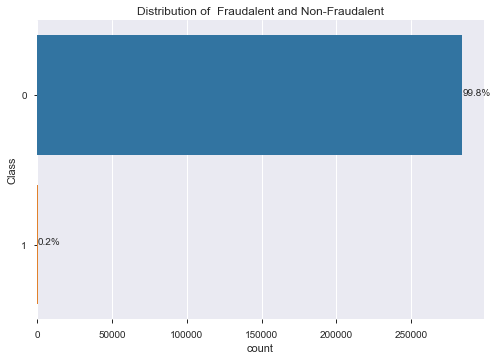

In [10]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
ax = sns.countplot(y="Class", data=df)
plt.title('Distribution of  Fraudalent and Non-Fraudalent')

total = len(df['Class'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

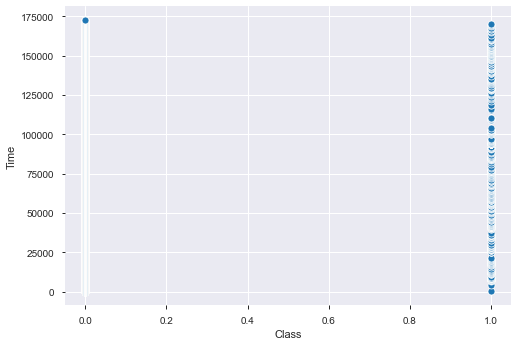

In [11]:
# Create a scatter plot to observe the distribution of classes with time
sns.scatterplot(x='Class',y='Time',data=df)

From the above graph it is clear that both Fraud and Non-fraud transactions occurs throughout the time , indicating there is no clear distinction.

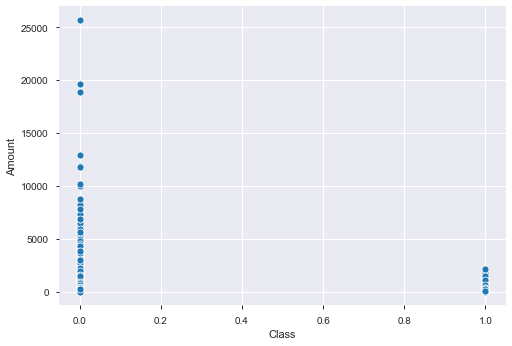

In [12]:
# Create a scatter plot to observe the distribution of classes with Amount
sns.scatterplot(x='Class',y='Amount',data=df)

From the above graph it is clear that no fraudalent transactions happen above the amount of 2,500.

In [13]:
# Drop unnecessary columns
df = df.drop('Time',axis=1)
print(df.columns)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')


### Splitting the data into train & test data

In [14]:
X=df.drop('Class',axis=1)
y= df['Class']

In [15]:
scaler = StandardScaler()
scaler.fit(X)



#from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.2,random_state=100,stratify=y)

StandardScaler()

In [16]:
sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)


# Note, this prints 5 times because the number of splits in the sss object 
# is set to be 5. See the following links to understand whats happening under
# the hood:
#  ---> https://github.com/knathanieltucker/bit-of-data-science-and-scikit-learn/blob/master/notebooks/CrossValidation.ipynb
#  ---> https://www.youtube.com/watch?v=L_dQrZZjGDg
# Overall, the percentages of fraud and non-fraud ('Class' feature) cases in the creating of 
# of all kfolds. Remember, since it is highly imbalanced, we dont want to 
# accidentally get a training set of all non-fraud cases and train our
# model on that. Therefore, we use Stratifiedkfold to combat this.


for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]
    
    
    
    
    

Train: [ 30473  30496  31002 ... 284804 284805 284806] Test: [    0     1     2 ... 57017 57018 57019]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 30473  30496  31002 ... 113964 113965 113966]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 81609  82400  83053 ... 170946 170947 170948]
Train: [     0      1      2 ... 284804 284805 284806] Test: [150654 150660 150661 ... 227866 227867 227868]
Train: [     0      1      2 ... 227866 227867 227868] Test: [212516 212644 213092 ... 284804 284805 284806]


In [17]:
print(np.sum(y))
print(np.sum(y_train_cv))
print(np.sum(y_test_cv))

492
394
98


### Plotting the distribution of a variable

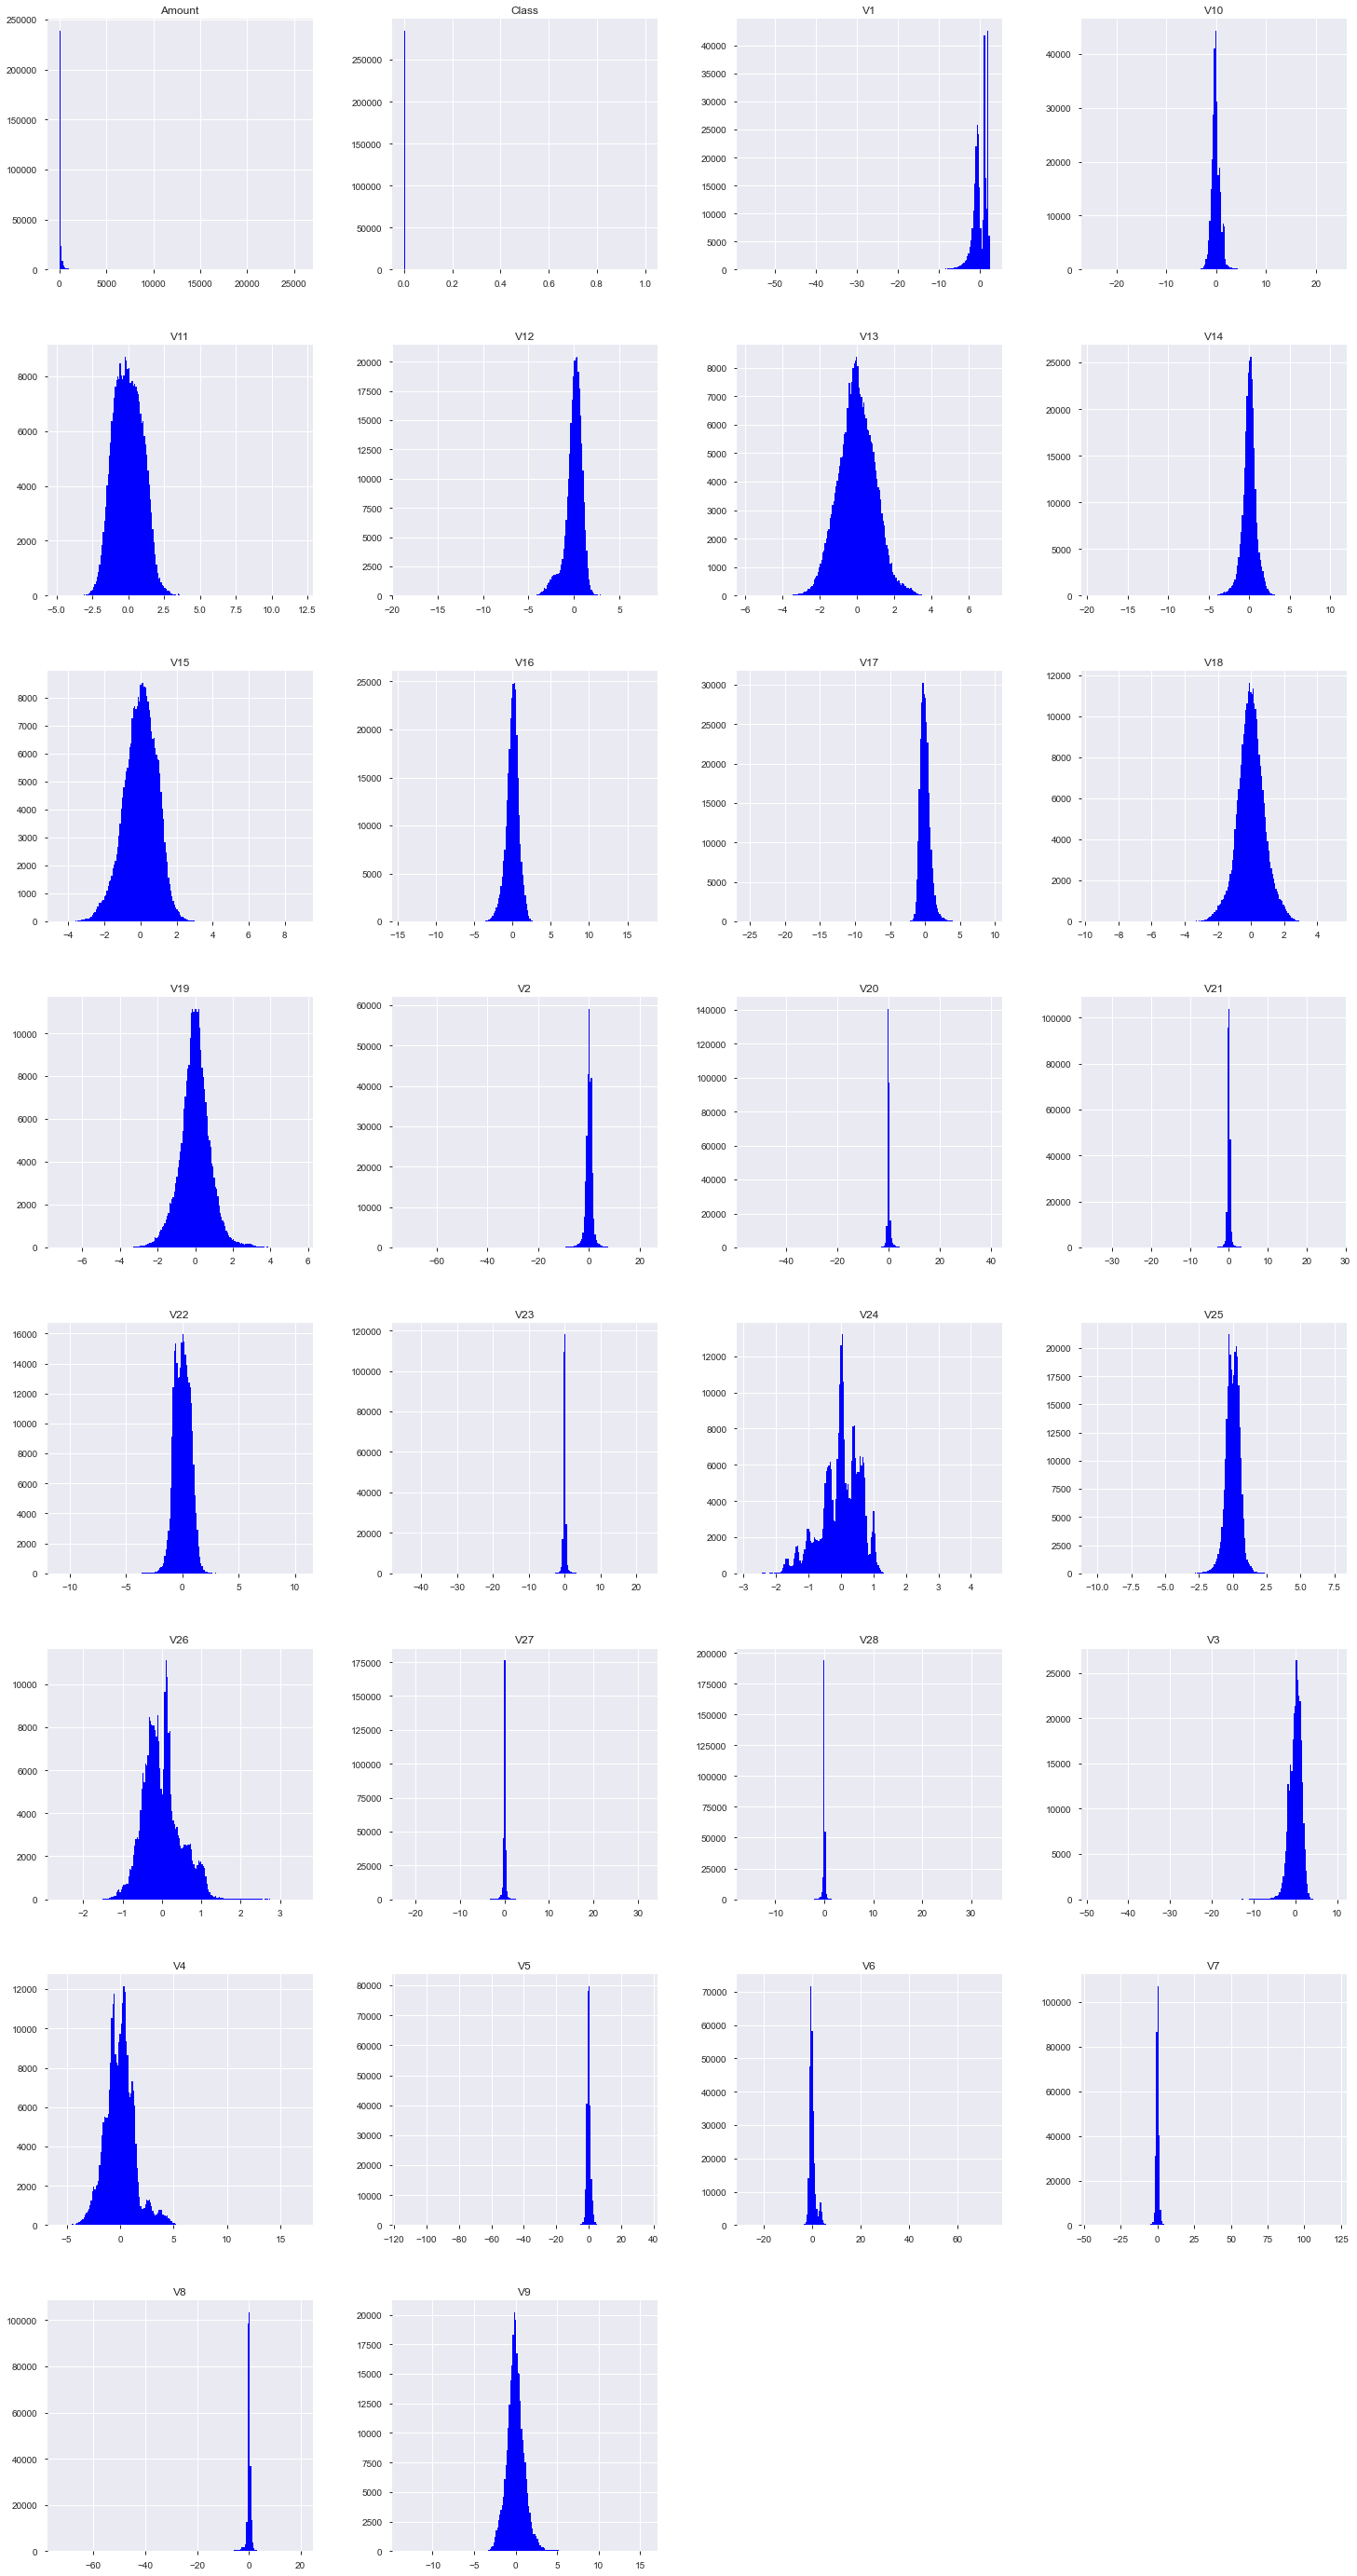

In [18]:
# plot the histogram of a variable from the dataset to see the skewness
df.hist(bins=200,color='blue',figsize=(25,50),layout=(8,4))
plt.show()

1. From the graph it is clear few of the features are skewed to either left or right. While others have normal distribution with mean equal to 0.
2. Features like V11, V15, V13, V18, V19 has a wider spread compared to other features. Some features like V6, V7, V8 and V28 have a very low spread as compared to other features.

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [19]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
power = PowerTransformer(method='yeo-johnson',copy=False)
X_train_trans = power.fit_transform(X_train_cv)
X_test_trans = power.fit_transform(X_test_cv)

In [20]:
y_train_pt = power.fit_transform(y_train_cv.to_frame())
y_test_pt = power.fit_transform(y_test_cv.to_frame())

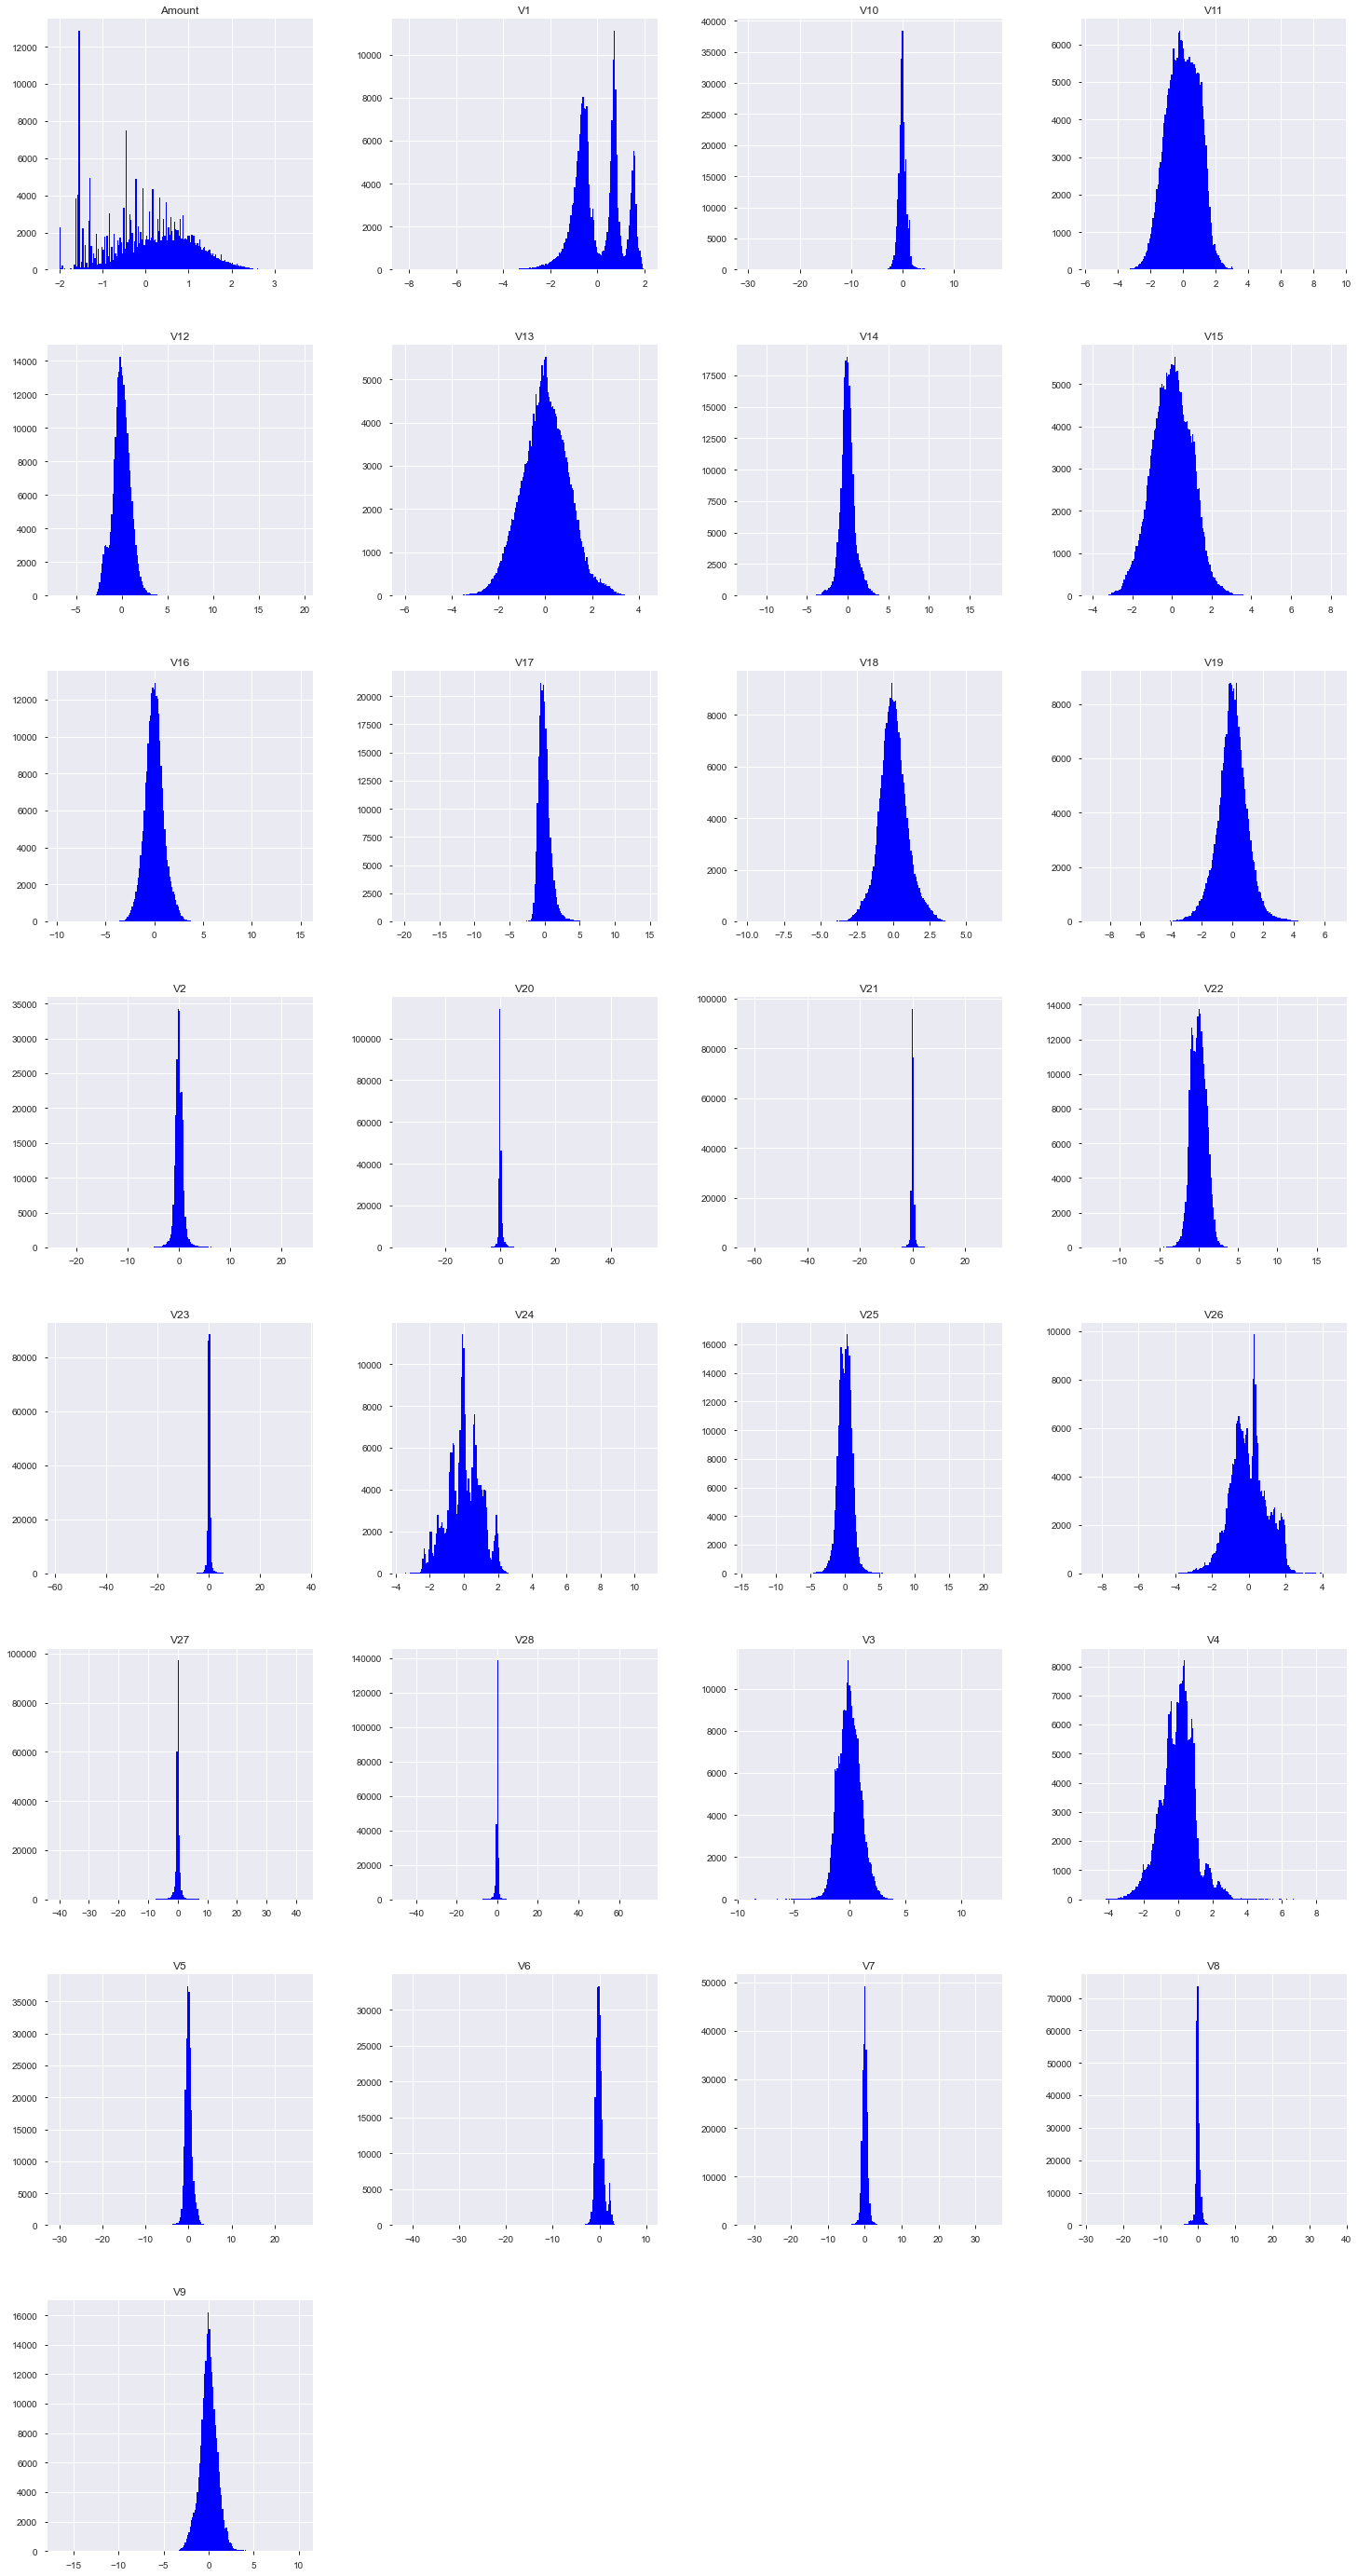

In [21]:
# plot the histogram of a variable from the dataset again to see the result 
X_train_cv.hist(bins=200,color='blue',figsize=(25,50),layout=(8,4))
plt.show()

## Model Building On Imbalanced Dataset
- Build different models on the imbalanced dataset and see the result

### Logistic Regression

In [42]:
y_train_pt = y_train_pt.astype('int') 
y_test_pt = y_test_pt.astype('int')

In [45]:
# Logistic Regression
#perform cross validation
#perform hyperparameter tuning
num_C = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],'penalty': ['l1','l2']  } #--> list of values
model_logreg = LogisticRegression(n_jobs=-1)
cv_num = RandomizedSearchCV(estimator=model_logreg, 
                                param_distributions=num_C, 
                                cv=3, scoring='roc_auc',
                                verbose=5,
                                n_jobs=-1,
                                return_train_score=True,
                                random_state=100)
cv_num.fit(X_train_trans, y_train_pt)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    7.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    7.2s finished


RandomizedSearchCV(cv=3, estimator=LogisticRegression(n_jobs=-1), n_jobs=-1,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100,
                                              1000],
                                        'penalty': ['l1', 'l2']},
                   random_state=100, return_train_score=True, scoring='roc_auc',
                   verbose=5)

In [46]:
print("Best Estimator",cv_num.best_estimator_)

Best Estimator LogisticRegression(C=0.001, n_jobs=-1)


In [47]:
print("Best Accuracy",cv_num.best_score_)

Best Accuracy 0.9713173457564052


In [48]:
#print the optimum value of hyperparameters
print("Best Parameters",cv_num.best_params_)

Best Parameters {'penalty': 'l2', 'C': 0.001}


### Logistic Regression With Optimal Hyperparameter

In [59]:
clf_logreg = LogisticRegression(n_jobs=-1,C=0.001,penalty='l2')
clf_logreg.fit(X_train_trans, y_train_pt)

LogisticRegression(C=0.001, n_jobs=-1)

In [60]:
y_pred = clf_logreg.predict(X_test_trans)

              precision    recall  f1-score   support

    No Fraud       1.00      1.00      1.00     56863
       Fraud       1.00      0.49      0.66        98

    accuracy                           1.00     56961
   macro avg       1.00      0.74      0.83     56961
weighted avg       1.00      1.00      1.00     56961

Accuracy for the test dataset 99.9%


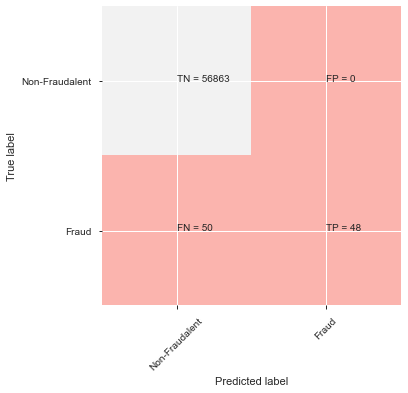

In [61]:
#print the evaluation result by choosing a evaluation metric
# Printing classification report
labels = ['No Fraud', 'Fraud']
print(classification_report(y_test_pt, y_pred, target_names=labels))
accuracy = metrics.accuracy_score(y_test_pt, y_pred)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )

cm = confusion_matrix(y_test_pt, y_pred)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
classNames = ['Non-Fraudalent','Fraud']
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=10)
plt.show()

In [62]:
print("The recall score for prediction is {:0.2f}".format(recall_score(y_test_pt, y_pred, pos_label = 24)))
print("The prescision score for predion is {:0.2f}".format(precision_score(y_test_pt, y_pred, pos_label = 24)))
print("AUC for testdata:    \t", roc_auc_score(y_test_pt, y_pred,average="macro"))

The recall score for prediction is 0.49
The prescision score for predion is 1.00
AUC for testdata:    	 0.7448979591836735


### Decision Tree

In [63]:
# Importing decision tree classifier from sklearn library
# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'max_depth': range(1, 10),
              'min_samples_leaf': range(30, 100, 50),
              'min_samples_split': range(5, 100, 50),
              'criterion': ["entropy", "gini"]}

dtree = DecisionTreeClassifier()
rs_cv = RandomizedSearchCV(estimator=dtree, 
                                param_distributions=parameters, 
                                cv=n_folds, scoring='roc_auc',
                                verbose=5,
                                n_jobs=-1,
                                return_train_score=True,
                                random_state=100)
rs_cv.fit(X_train_trans, y_train_pt)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   15.3s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   43.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   43.1s finished


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': range(1, 10),
                                        'min_samples_leaf': range(30, 100, 50),
                                        'min_samples_split': range(5, 100, 50)},
                   random_state=100, return_train_score=True, scoring='roc_auc',
                   verbose=5)

In [64]:
print("Best Estimator",rs_cv.best_estimator_)
print("Best Accuracy",rs_cv.best_score_)
#print the optimum value of hyperparameters
print("Best Parameters",rs_cv.best_params_)

Best Estimator DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=80,
                       min_samples_split=55)
Best Accuracy 0.9488204137790951
Best Parameters {'min_samples_split': 55, 'min_samples_leaf': 80, 'max_depth': 6, 'criterion': 'entropy'}


### Decision Tree With Optimal Hyperparameters

In [65]:
clf_dtree = DecisionTreeClassifier(min_samples_split=55,min_samples_leaf=80,max_depth=6,criterion='entropy')
clf_dtree.fit(X_train_trans, y_train_pt)

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=80,
                       min_samples_split=55)

In [66]:
#prediction on the test data
y_pred_tree = clf_dtree.predict(X_test_trans)

              precision    recall  f1-score   support

    No Fraud       1.00      1.00      1.00     56863
       Fraud       0.73      0.63      0.68        98

    accuracy                           1.00     56961
   macro avg       0.86      0.82      0.84     56961
weighted avg       1.00      1.00      1.00     56961

Accuracy for the test dataset 99.9%


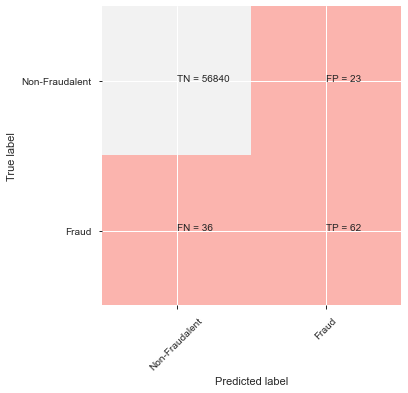

In [67]:
#print the evaluation result by choosing a evaluation metric
# Printing classification report
labels = ['No Fraud', 'Fraud']
print(classification_report(y_test_pt, y_pred_tree,target_names=labels))
accuracy = metrics.accuracy_score(y_test_pt, y_pred_tree)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )


cm = confusion_matrix(y_test_pt, y_pred_tree)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
classNames = ['Non-Fraudalent','Fraud']
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=10)
plt.show()

In [68]:
print("The recall score for prediction is {:0.2f}".format(recall_score(y_test_pt, y_pred_tree, pos_label = 24)))
print("The prescision score for predion is {:0.2f}".format(precision_score(y_test_pt, y_pred_tree, pos_label = 24)))
print("AUC for testdata:    \t", roc_auc_score(y_test_pt, y_pred_tree,average="macro"))

The recall score for prediction is 0.63
The prescision score for predion is 0.73
AUC for testdata:    	 0.8161242901395298


### Random Forest

In [69]:
## specify number of folds for k-fold CV
n_folds = 3

## parameters to build the model on
parameters = {'n_estimators': range(10, 200, 500),
               'max_depth': range(2, 20, 10),
               'min_samples_leaf': range(10, 500, 100),
               'min_samples_split': range(10, 300, 100),
               'max_features': range(3,20,10)}

rf = RandomForestClassifier()
rs_cv_rf = RandomizedSearchCV(estimator=rf, 
                                param_distributions=parameters, 
                                cv=n_folds, scoring='roc_auc',
                                verbose=5,
                                n_jobs=-1,
                                return_train_score=True,
                                random_state=100)
rs_cv_rf.fit(X_train_trans, y_train_pt)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   27.7s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.7min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.7min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': range(2, 20, 10),
                                        'max_features': range(3, 20, 10),
                                        'min_samples_leaf': range(10, 500, 100),
                                        'min_samples_split': range(10, 300, 100),
                                        'n_estimators': range(10, 200, 500)},
                   random_state=100, return_train_score=True, scoring='roc_auc',
                   verbose=5)

In [70]:
print("Best Estimator",rs_cv_rf.best_estimator_)
print("Best Accuracy",rs_cv_rf.best_score_)
#print the optimum value of hyperparameters
print("Best Parameters",rs_cv_rf.best_params_)

Best Estimator RandomForestClassifier(max_depth=12, max_features=13, min_samples_leaf=210,
                       min_samples_split=10, n_estimators=10)
Best Accuracy 0.9657803114453912
Best Parameters {'n_estimators': 10, 'min_samples_split': 10, 'min_samples_leaf': 210, 'max_features': 13, 'max_depth': 12}


### Random forest With Optimal Hyperparameter

In [71]:
clf_rf = RandomForestClassifier(n_estimators=10, min_samples_split=10, min_samples_leaf=210, max_features=13, max_depth=12)
clf_rf.fit(X_train_trans, y_train_pt)

RandomForestClassifier(max_depth=12, max_features=13, min_samples_leaf=210,
                       min_samples_split=10, n_estimators=10)

In [72]:
#prediction on the test data
y_pred_rf = clf_rf.predict(X_test_trans)

              precision    recall  f1-score   support

    No Fraud       1.00      1.00      1.00     56863
       Fraud       0.94      0.67      0.79        98

    accuracy                           1.00     56961
   macro avg       0.97      0.84      0.89     56961
weighted avg       1.00      1.00      1.00     56961

Accuracy for the test dataset 99.9%


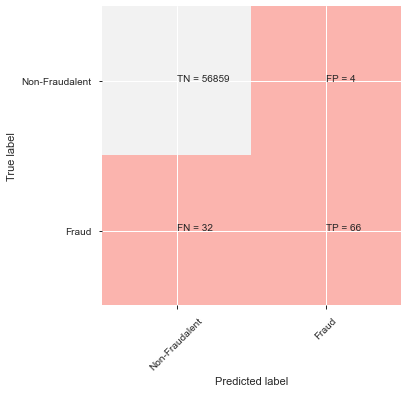

In [73]:
#print the evaluation result by choosing a evaluation metric
# Printing classification report
labels = ['No Fraud', 'Fraud']
print(classification_report(y_test_pt, y_pred_rf,target_names=labels))
accuracy = metrics.accuracy_score(y_test_pt, y_pred_rf)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )
cm = confusion_matrix(y_test_pt, y_pred_rf)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
classNames = ['Non-Fraudalent','Fraud']
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=10)
plt.show()

In [74]:
print("The recall score for prediction is {:0.2f}".format(recall_score(y_test_pt, y_pred_rf, pos_label = 24)))
print("The prescision score for predion is {:0.2f}".format(precision_score(y_test_pt, y_pred_rf, pos_label = 24)))
print("AUC for testdata:    \t", roc_auc_score(y_test_pt, y_pred_rf,average="macro"))

The recall score for prediction is 0.67
The prescision score for predion is 0.94
AUC for testdata:    	 0.8366995216214267


### XGBoost

In [75]:
## specify number of folds for k-fold CV
n_folds = 3

## parameters to build the model on
parameters = {'n_estimators': range(100, 500, 100),
               'max_depth': range(5, 20, 5),
               'learning_rate' : [0.1,0.01],
               'gamma':[i/10.0 for i in range(0,5)],
               'subsample':[0.8,0.9] ,
               'colsample_bytree':[0.8,0.9]
                }

xg = XGBClassifier()
rs_cv_xg = RandomizedSearchCV(estimator=xg, 
                                param_distributions=parameters, 
                                cv=n_folds, scoring='roc_auc',
                                verbose=5,
                                n_jobs=-1,
                                return_train_score=True,
                                random_state=20)
rs_cv_xg.fit(X_train_trans, y_train_pt)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 19.0min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 19.0min finished


RandomizedSearchCV(cv=3, estimator=XGBClassifier(), n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.8, 0.9],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.1, 0.01],
                                        'max_depth': range(5, 20, 5),
                                        'n_estimators': range(100, 500, 100),
                                        'subsample': [0.8, 0.9]},
                   random_state=20, return_train_score=True, scoring='roc_auc',
                   verbose=5)

In [76]:
print("Best Estimator",rs_cv_xg.best_estimator_)
print("Best Accuracy",rs_cv_xg.best_score_)
#print the optimum value of hyperparameters
print("Best Parameters",rs_cv_xg.best_params_)

Best Estimator XGBClassifier(colsample_bytree=0.9, gamma=0.2, max_depth=10, subsample=0.9)
Best Accuracy 0.9768064856727018
Best Parameters {'subsample': 0.9, 'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 0.2, 'colsample_bytree': 0.9}


### XGBoost with Optimal Hyperparameters

In [77]:
clf_xg = XGBClassifier(subsample= 0.9, n_estimators= 300, max_depth=10, learning_rate= 0.1, gamma= 0.0, colsample_bytree= 0.8)
clf_xg.fit(X_train_trans, y_train_pt)

XGBClassifier(colsample_bytree=0.8, gamma=0.0, max_depth=10, n_estimators=300,
              subsample=0.9)

In [78]:
#prediction on the test data
y_pred_xg = clf_xg.predict(X_test_trans)

              precision    recall  f1-score   support

    No Fraud       1.00      1.00      1.00     56863
       Fraud       0.96      0.72      0.83        98

    accuracy                           1.00     56961
   macro avg       0.98      0.86      0.91     56961
weighted avg       1.00      1.00      1.00     56961

Accuracy for the test dataset 99.9%


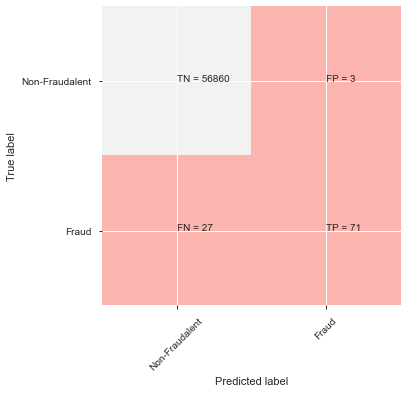

In [79]:
#print the evaluation result by choosing a evaluation metric
# Printing classification report
labels = ['No Fraud', 'Fraud']
print(classification_report(y_test_pt, y_pred_xg,target_names=labels))
accuracy = metrics.accuracy_score(y_test_pt, y_pred_xg)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )

cm = confusion_matrix(y_test_pt, y_pred_xg)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
classNames = ['Non-Fraudalent','Fraud']
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=10)
plt.show()

In [80]:
print("The recall score for prediction is {:0.2f}".format(recall_score(y_test_pt, y_pred_xg, pos_label = 24)))
print("The prescision score for predion is {:0.2f}".format(precision_score(y_test_pt, y_pred_xg, pos_label = 24)))
print("AUC for testdata:    \t", roc_auc_score(y_test_pt, y_pred_xg,average="macro"))

The recall score for prediction is 0.72
The prescision score for predion is 0.96
AUC for testdata:    	 0.8622185187670904


### Supprt Vector Machine

In [81]:
## specify number of folds for k-fold CV
n_folds = 3

## parameters to build the model on
parameters = {'C' : [1,2],
               'gamma':['scale','auto']}

supvm = SVC()
rs_cv_svm = RandomizedSearchCV(estimator=supvm, 
                                param_distributions=parameters, 
                                cv=n_folds, scoring='roc_auc',
                                verbose=5,
                                n_jobs=-1,
                                return_train_score=True,
                                random_state=20)
rs_cv_svm.fit(X_train_trans, y_train_pt)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  12 | elapsed:  4.4min remaining:  2.2min
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  6.1min finished


RandomizedSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
                   param_distributions={'C': [1, 2],
                                        'gamma': ['scale', 'auto']},
                   random_state=20, return_train_score=True, scoring='roc_auc',
                   verbose=5)

In [82]:
print("Best Estimator",rs_cv_svm.best_estimator_)
print("Best Accuracy",rs_cv_svm.best_score_)
#print the optimum value of hyperparameters
print("Best Parameters",rs_cv_svm.best_params_)

Best Estimator SVC(C=1)
Best Accuracy 0.9542571055691833
Best Parameters {'gamma': 'scale', 'C': 1}


### SVM with Optimal Hyperparameters

In [83]:
clf_svm = SVC(kernel='rbf',C=1,gamma='scale')
clf_svm.fit(X_train_trans, y_train_pt)

SVC(C=1)

In [84]:
#prediction on the test data
y_pred_svm = clf_svm.predict(X_test_trans)

              precision    recall  f1-score   support

    No Fraud       1.00      1.00      1.00     56863
       Fraud       0.97      0.31      0.47        98

    accuracy                           1.00     56961
   macro avg       0.98      0.65      0.73     56961
weighted avg       1.00      1.00      1.00     56961

Accuracy for the test dataset 99.9%


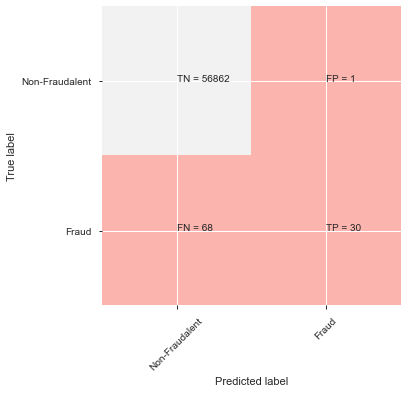

In [85]:
#print the evaluation result by choosing a evaluation metric
# Printing classification report
labels = ['No Fraud', 'Fraud']
print(classification_report(y_test_pt, y_pred_svm,target_names=labels))
accuracy = metrics.accuracy_score(y_test_pt, y_pred_svm)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )

cm = confusion_matrix(y_test_pt, y_pred_svm)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
classNames = ['Non-Fraudalent','Fraud']
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=10)
plt.show()

In [86]:
print("The recall score for prediction is {:0.2f}".format(recall_score(y_test_pt, y_pred_svm, pos_label = 24)))
print("The prescision score for predion is {:0.2f}".format(precision_score(y_test_pt, y_pred_svm, pos_label = 24)))
print("AUC for testdata:    \t", roc_auc_score(y_test_pt, y_pred_svm,average="macro"))

The recall score for prediction is 0.31
The prescision score for predion is 0.97
AUC for testdata:    	 0.653052431425765


#### Proceed with the model which shows the best result 
- Apply the best hyperparameter on the model
- Predict on the test dataset

### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 17
2nd Top var = 12
3rd Top var = 10


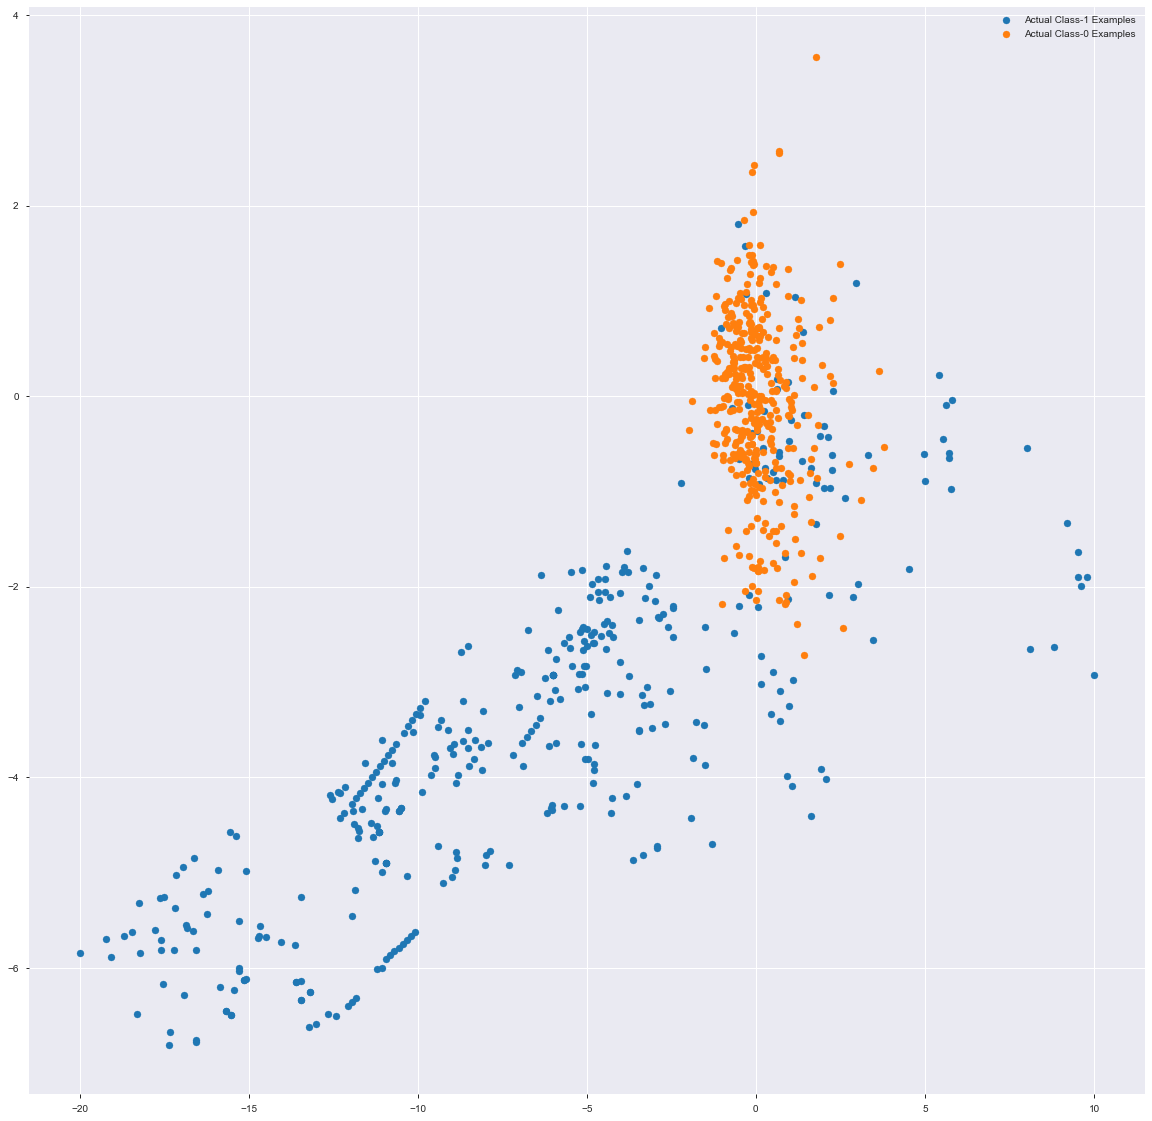

In [87]:
var_imp = []
for i in clf_xg.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf_xg.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf_xg.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf_xg.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf_xg.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf_xg.feature_importances_)[-2])

X_train_1 = X_train_cv.values[np.where(y_train_cv==1.0)]
X_train_0 = X_train_cv.values[np.where(y_train_cv==0.0)]

np.random.shuffle(X_train_0)

#import matplotlib.pyplot as plt
#%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

### Random Oversampling

(454904, 29)


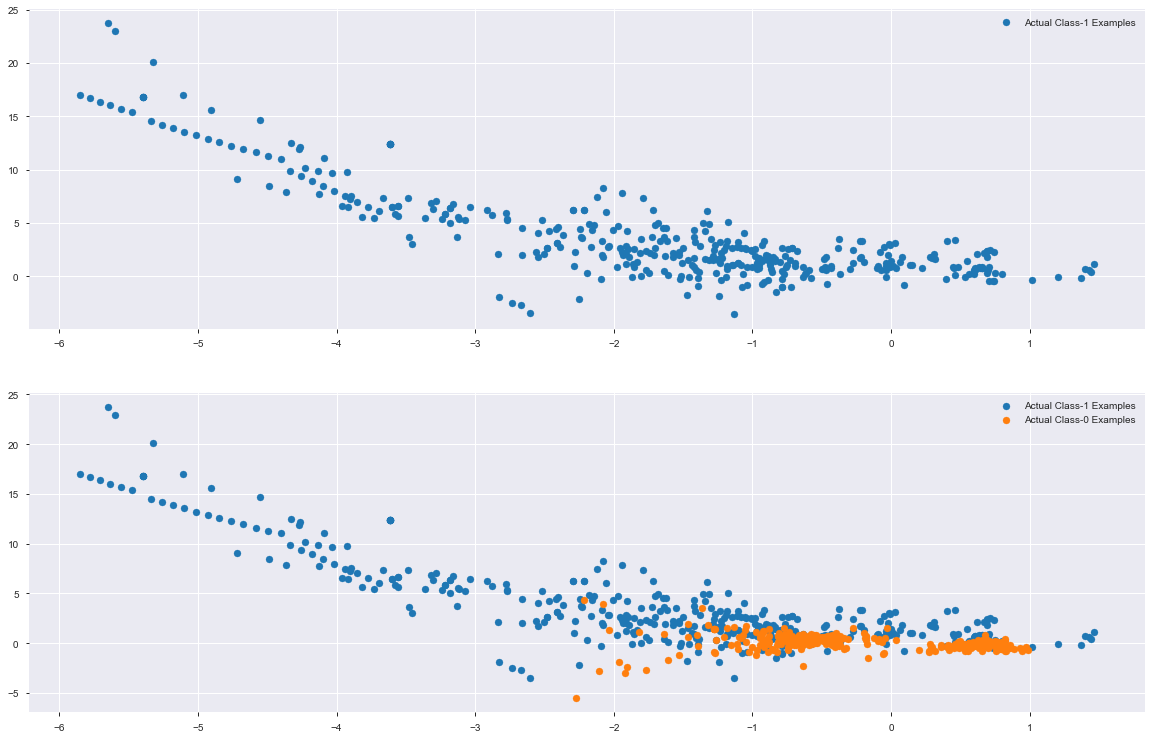

In [88]:
ros = RandomOverSampler()
X_train_ros, y_train_ros = ros.fit_resample(X_train_trans, y_train_pt)
print(X_train_ros.shape)
X_train_ros_1 = X_train_ros[X_train_cv.shape[0]:]

X_train_1 = X_train_cv.values[np.where(y_train_cv==1.0)]
X_train_0 = X_train_cv.values[np.where(y_train_cv==0.0)]


import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

### Logistic Regeression

In [89]:
# Hyper parameter tuning in Logistic Regression
params = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],'penalty': ['l1','l2']  } #--> list of values
logreg = LogisticRegression(n_jobs=-1)
cv_logreg = RandomizedSearchCV(estimator=logreg, 
                                param_distributions=params, 
                                cv=3, scoring='roc_auc',
                                verbose=5,
                                n_jobs=-1,
                                return_train_score=True,
                                random_state=100)
cv_logreg.fit(X_train_ros, y_train_ros)
print("Best Estimator",cv_logreg.best_estimator_)
print("Best Accuracy",cv_logreg.best_score_)
print("Best Parameters",cv_logreg.best_params_)
# Logistic Regression With Optimal Hyper parameter
clf_logreg = LogisticRegression(n_jobs=-1,C=10,penalty='l2')
# Prediction on the Test Data
clf_logreg.fit(X_train_ros, y_train_ros)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   12.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   12.4s finished


Best Estimator LogisticRegression(C=100, n_jobs=-1)
Best Accuracy 0.9816328446161178
Best Parameters {'penalty': 'l2', 'C': 100}


LogisticRegression(C=10, n_jobs=-1)

In [90]:
num_C = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],'penalty': ['l1','l2']  } #--> list of values
model_logreg = LogisticRegression(n_jobs=-1)
cv_num = RandomizedSearchCV(estimator=model_logreg, 
                                param_distributions=num_C, 
                                cv=3, scoring='roc_auc',
                                verbose=5,
                                n_jobs=-1,
                                return_train_score=True,
                                random_state=100)
cv_num.fit(X_train_ros, y_train_ros)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   11.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   11.6s finished


RandomizedSearchCV(cv=3, estimator=LogisticRegression(n_jobs=-1), n_jobs=-1,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100,
                                              1000],
                                        'penalty': ['l1', 'l2']},
                   random_state=100, return_train_score=True, scoring='roc_auc',
                   verbose=5)

In [91]:
print("Best Estimator",cv_num.best_estimator_)
print("Best Accuracy",cv_num.best_score_)
#print the optimum value of hyperparameters
print("Best Parameters",cv_num.best_params_)

Best Estimator LogisticRegression(C=100, n_jobs=-1)
Best Accuracy 0.9816328446161178
Best Parameters {'penalty': 'l2', 'C': 100}


### Logistic Regression With Optimal Hyperparameter Tuning

In [92]:
clf_logreg = LogisticRegression(n_jobs=-1,C=10,penalty='l2')
clf_logreg.fit(X_train_ros, y_train_ros)

LogisticRegression(C=10, n_jobs=-1)

In [93]:
y_pred = clf_logreg.predict(X_test_trans)

              precision    recall  f1-score   support

    No Fraud       1.00      0.96      0.98     56863
       Fraud       0.04      0.91      0.07        98

    accuracy                           0.96     56961
   macro avg       0.52      0.93      0.53     56961
weighted avg       1.00      0.96      0.98     56961

Accuracy for the test dataset 96.0%


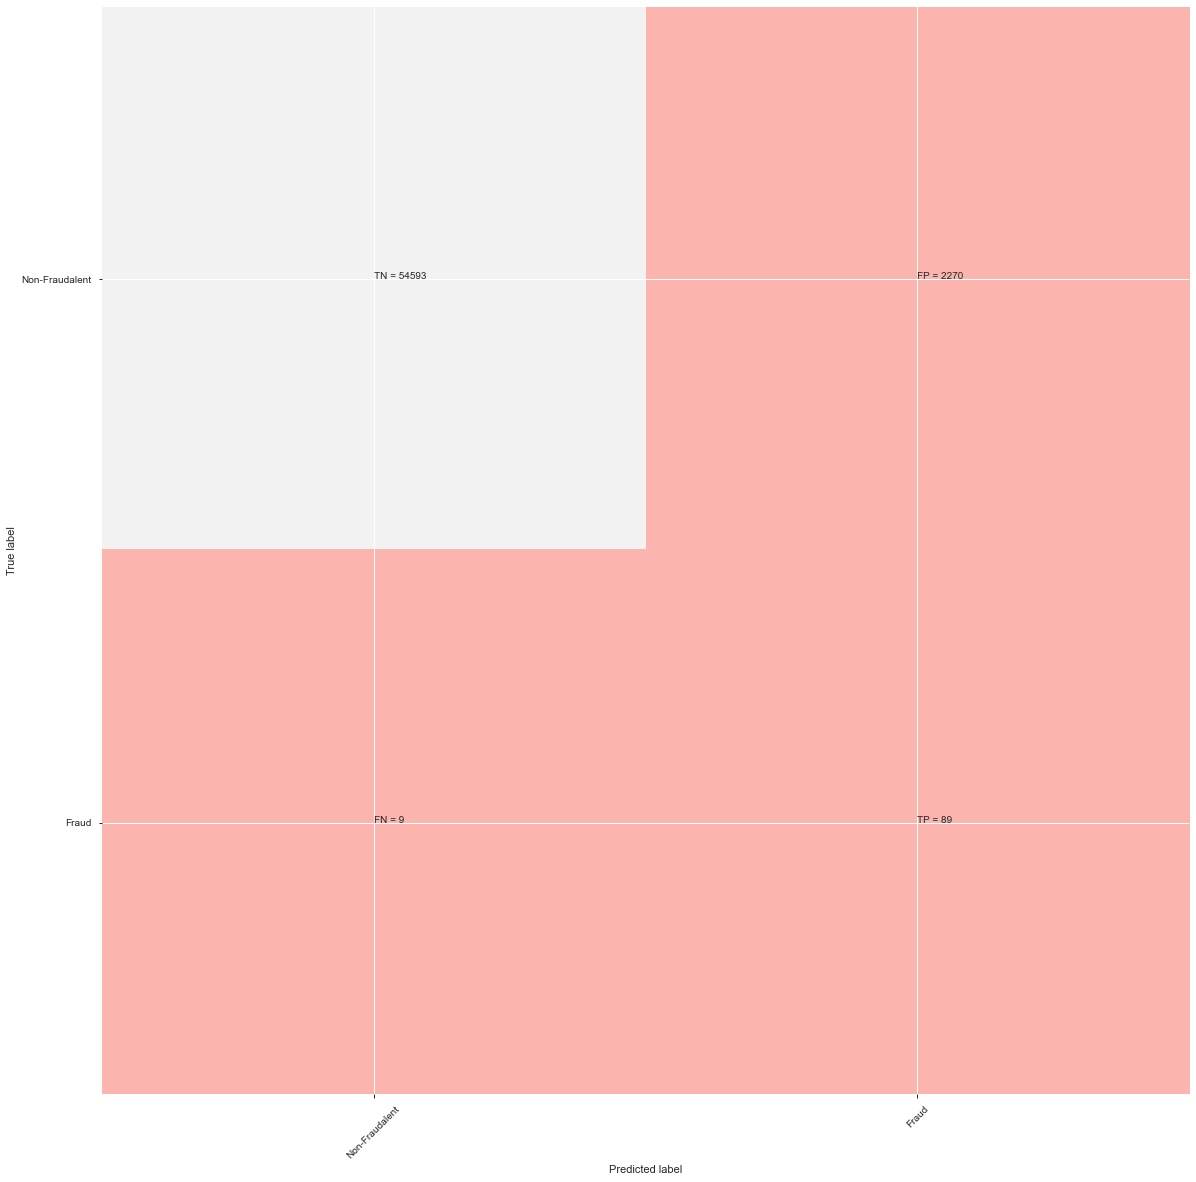

In [94]:
#print the evaluation result by choosing a evaluation metric
# Printing classification report
labels = ['No Fraud', 'Fraud']
print(classification_report(y_test_pt, y_pred, target_names=labels))
accuracy = metrics.accuracy_score(y_test_pt, y_pred)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )
cm = confusion_matrix(y_test_pt, y_pred)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
classNames = ['Non-Fraudalent','Fraud']
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=10)
plt.show()

In [95]:
print("The recall score for prediction is {:0.2f}".format(recall_score(y_test_pt, y_pred, pos_label = 24)))
print("The prescision score for predion is {:0.2f}".format(precision_score(y_test_pt, y_pred, pos_label = 24)))
print("AUC for testdata:    \t", round(roc_auc_score(y_test_pt, y_pred),5))

The recall score for prediction is 0.91
The prescision score for predion is 0.04
AUC for testdata:    	 0.93412


### Decision Tree

In [96]:
# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'max_depth': range(1, 20),
              'min_samples_leaf': range(30, 100, 50),
              'min_samples_split': range(5, 100, 50),
              'criterion': ["entropy", "gini"]}

dtree = DecisionTreeClassifier()
rs_cv = RandomizedSearchCV(estimator=dtree, 
                                param_distributions=parameters, 
                                cv=n_folds, scoring='roc_auc',
                                verbose=5,
                                n_jobs=-1,
                                return_train_score=True,
                                random_state=100)
rs_cv.fit(X_train_ros, y_train_ros)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   20.4s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   57.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   57.2s finished


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': range(1, 20),
                                        'min_samples_leaf': range(30, 100, 50),
                                        'min_samples_split': range(5, 100, 50)},
                   random_state=100, return_train_score=True, scoring='roc_auc',
                   verbose=5)

In [97]:
print("Best Estimator",rs_cv.best_estimator_)
print("Best Accuracy",rs_cv.best_score_)
#print the optimum value of hyperparameters
print("Best Parameters",rs_cv.best_params_)

Best Estimator DecisionTreeClassifier(max_depth=13, min_samples_leaf=30, min_samples_split=5)
Best Accuracy 0.9994223085697223
Best Parameters {'min_samples_split': 5, 'min_samples_leaf': 30, 'max_depth': 13, 'criterion': 'gini'}


### Decision Tree With Optimal Hyperparameters

In [98]:
clf_dtree = DecisionTreeClassifier(min_samples_split=5,min_samples_leaf=30,max_depth=13,criterion='gini')
clf_dtree.fit(X_train_ros, y_train_ros)

DecisionTreeClassifier(max_depth=13, min_samples_leaf=30, min_samples_split=5)

In [99]:
#prediction on the test data
y_pred_tree = clf_dtree.predict(X_test_trans)

              precision    recall  f1-score   support

    No Fraud       1.00      1.00      1.00     56863
       Fraud       0.27      0.73      0.39        98

    accuracy                           1.00     56961
   macro avg       0.63      0.87      0.69     56961
weighted avg       1.00      1.00      1.00     56961

Accuracy for the test dataset 99.6%


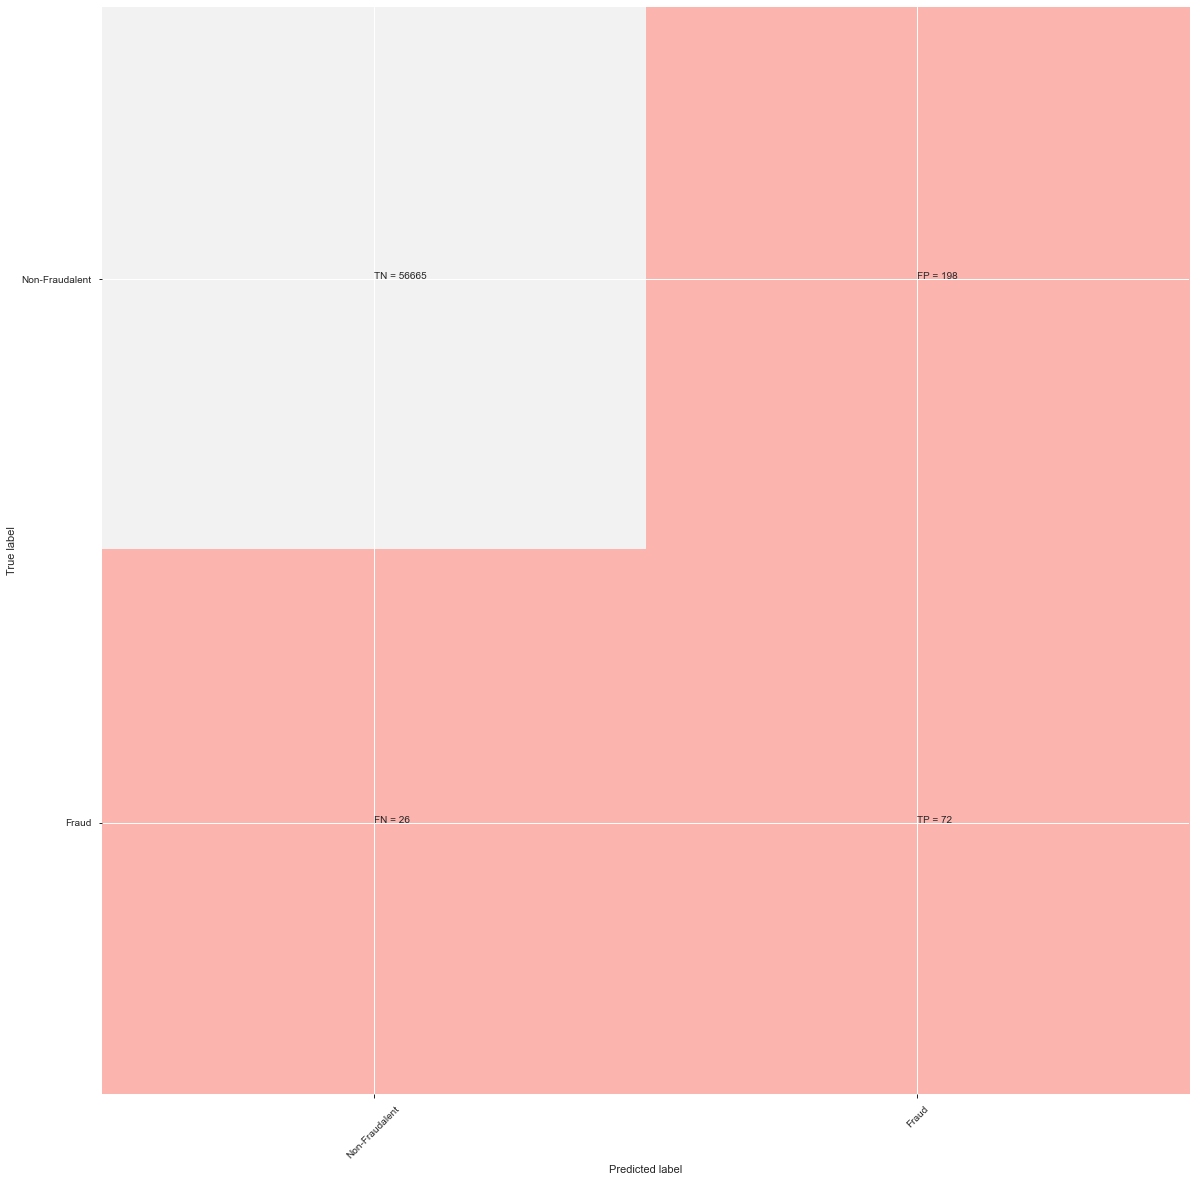

In [100]:
#print the evaluation result by choosing a evaluation metric
# Printing classification report
labels = ['No Fraud', 'Fraud']
print(classification_report(y_test_pt, y_pred_tree,target_names=labels))
accuracy = metrics.accuracy_score(y_test_pt, y_pred_tree)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )

cm = confusion_matrix(y_test_pt, y_pred_tree)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
classNames = ['Non-Fraudalent','Fraud']
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=10)
plt.show()

In [101]:
print("The recall score for prediction is {:0.2f}".format(recall_score(y_test_pt, y_pred_tree, pos_label = 24)))
print("The prescision score for predion is {:0.2f}".format(precision_score(y_test_pt, y_pred_tree, pos_label = 24)))
print("AUC for testdata:    \t", round(roc_auc_score(y_test_pt, y_pred_tree),5))

The recall score for prediction is 0.73
The prescision score for predion is 0.27
AUC for testdata:    	 0.86561


### Random Forest

In [102]:
## specify number of folds for k-fold CV
n_folds = 3

## parameters to build the model on
parameters = {'n_estimators': range(10, 100, 25),
               'max_depth': range(2, 20, 10),
               'min_samples_leaf': range(10, 500, 100),
               'min_samples_split': range(10, 500, 100),
               'max_features': range(5,40,10)}

rf = RandomForestClassifier()
rs_cv_rf = RandomizedSearchCV(estimator=rf, 
                                param_distributions=parameters, 
                                cv=n_folds, scoring='roc_auc',
                                verbose=5,
                                n_jobs=-1,
                                return_train_score=True,
                                random_state=100)
rs_cv_rf.fit(X_train_ros, y_train_ros)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  6.3min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  6.3min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': range(2, 20, 10),
                                        'max_features': range(5, 40, 10),
                                        'min_samples_leaf': range(10, 500, 100),
                                        'min_samples_split': range(10, 500, 100),
                                        'n_estimators': range(10, 100, 25)},
                   random_state=100, return_train_score=True, scoring='roc_auc',
                   verbose=5)

In [103]:
print("Best Estimator",rs_cv_rf.best_estimator_)
print("Best Accuracy",rs_cv_rf.best_score_)
#print the optimum value of hyperparameters
print("Best  HyperParameters",rs_cv_rf.best_params_)

Best Estimator RandomForestClassifier(max_depth=12, max_features=5, min_samples_leaf=210,
                       min_samples_split=210, n_estimators=60)
Best Accuracy 0.9998414991523626
Best  HyperParameters {'n_estimators': 60, 'min_samples_split': 210, 'min_samples_leaf': 210, 'max_features': 5, 'max_depth': 12}


### Random Forest With Optimal Hyperparameters 

In [104]:
clf_rf = RandomForestClassifier(n_estimators=60, min_samples_split=210, min_samples_leaf=210, max_features=5, max_depth=12)
clf_rf.fit(X_train_ros, y_train_ros)

RandomForestClassifier(max_depth=12, max_features=5, min_samples_leaf=210,
                       min_samples_split=210, n_estimators=60)

In [105]:
#prediction on the test data
y_pred_rf = clf_rf.predict(X_test_trans)

              precision    recall  f1-score   support

    No Fraud       1.00      1.00      1.00     56863
       Fraud       0.49      0.81      0.61        98

    accuracy                           1.00     56961
   macro avg       0.74      0.90      0.80     56961
weighted avg       1.00      1.00      1.00     56961

Accuracy for the test dataset 99.8%


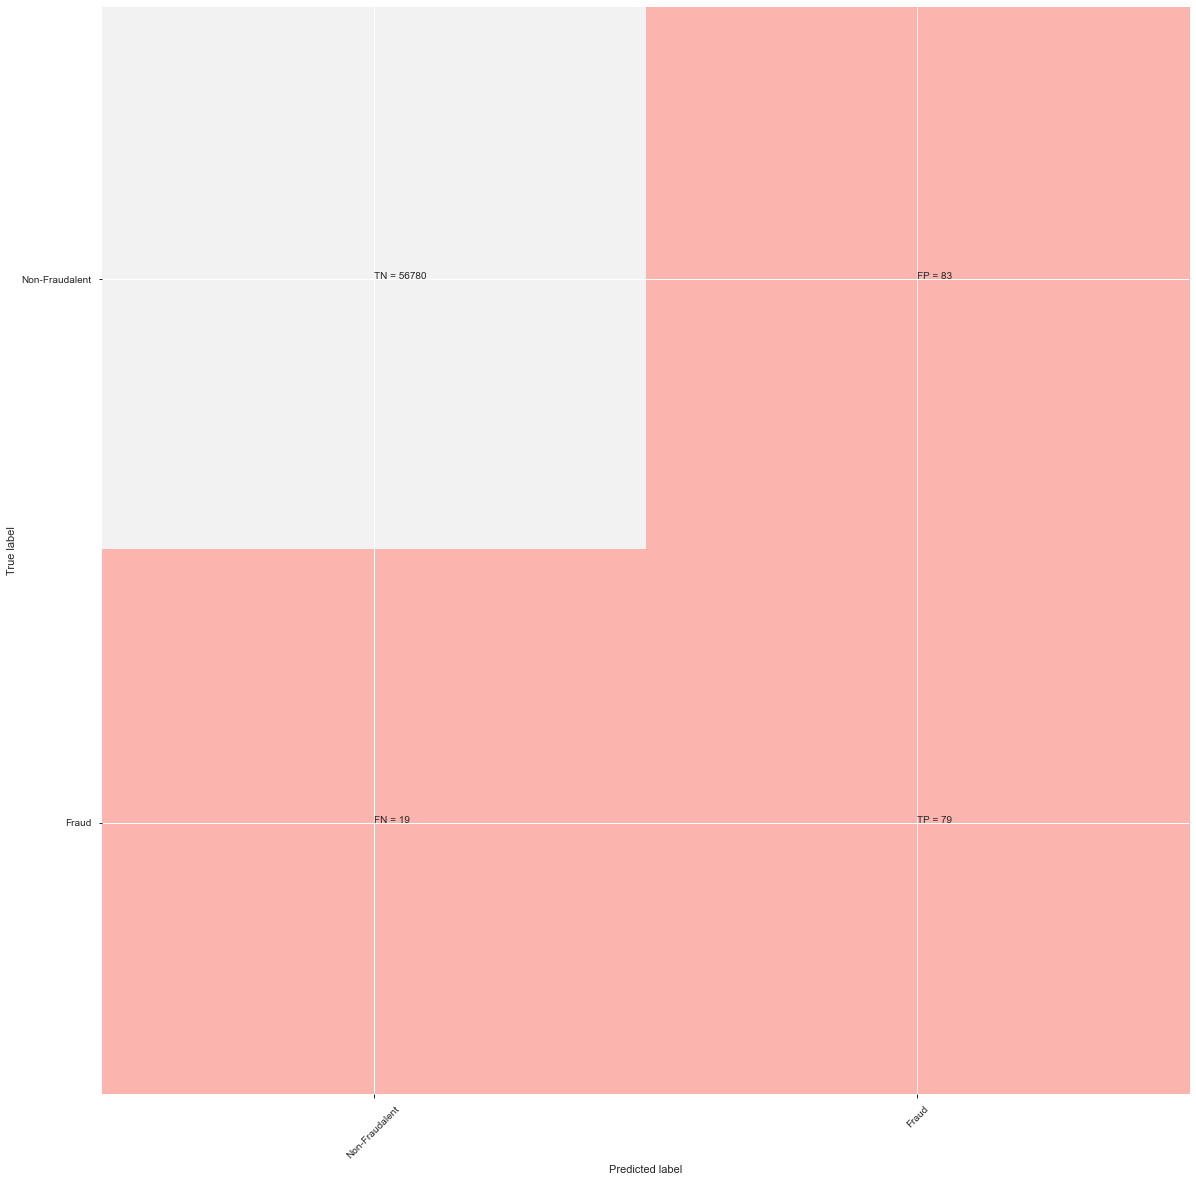

In [106]:
#print the evaluation result by choosing a evaluation metric
# Printing classification report
labels = ['No Fraud', 'Fraud']
print(classification_report(y_test_pt, y_pred_rf,target_names=labels))
accuracy = metrics.accuracy_score(y_test_pt, y_pred_rf)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )

cm = confusion_matrix(y_test_pt, y_pred_rf)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
classNames = ['Non-Fraudalent','Fraud']
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=10)
plt.show()

In [107]:
print("The recall score for prediction is {:0.2f}".format(recall_score(y_test_pt, y_pred_rf, pos_label = 24)))
print("The prescision score for predion is {:0.2f}".format(precision_score(y_test_pt, y_pred_rf, pos_label = 24)))
print("AUC for testdata:    \t", round(roc_auc_score(y_test_pt, y_pred_rf),5))

The recall score for prediction is 0.81
The prescision score for predion is 0.49
AUC for testdata:    	 0.90233


### XGBoost

In [108]:
## specify number of folds for k-fold CV
n_folds = 3

## parameters to build the model on
parameters = {'n_estimators': range(10, 500, 100),
               'max_depth': range(5, 50, 10),
               'learning_rate' : [0.1,0.01,0.0001,0.00001],
               'gamma':[i/10.0 for i in range(0,5)],
               'subsample':[0.5,0.6] ,
               'colsample_bytree':[0.5,0.6]
                }

xg = XGBClassifier()
rs_cv_xg = RandomizedSearchCV(estimator=xg, 
                                param_distributions=parameters, 
                                cv=n_folds, scoring='roc_auc',
                                verbose=5,
                                n_jobs=-1,
                                return_train_score=True,
                                random_state=20)
rs_cv_xg.fit(X_train_ros, y_train_ros)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed: 28.7min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 62.9min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 62.9min finished


RandomizedSearchCV(cv=3, estimator=XGBClassifier(), n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.5, 0.6],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.1, 0.01, 0.0001,
                                                          1e-05],
                                        'max_depth': range(5, 50, 10),
                                        'n_estimators': range(10, 500, 100),
                                        'subsample': [0.5, 0.6]},
                   random_state=20, return_train_score=True, scoring='roc_auc',
                   verbose=5)

In [109]:
print("Best Estimator",rs_cv_xg.best_estimator_)
print("Best Accuracy",rs_cv_xg.best_score_)
#print the optimum value of hyperparameters
print("Best HyperParameters",rs_cv_xg.best_params_)

Best Estimator XGBClassifier(colsample_bytree=0.6, gamma=0.2, max_depth=25, n_estimators=410,
              subsample=0.5)
Best Accuracy 0.9999014065911185
Best HyperParameters {'subsample': 0.5, 'n_estimators': 410, 'max_depth': 25, 'learning_rate': 0.1, 'gamma': 0.2, 'colsample_bytree': 0.6}


### XGBoost With Optimal HyperParameters

In [110]:
clf_xg = XGBClassifier(subsample= 0.5, n_estimators= 410, max_depth=25, learning_rate= 0.1, gamma= 0.2, colsample_bytree= 0.6)
clf_xg.fit(X_train_ros, y_train_ros)

XGBClassifier(colsample_bytree=0.6, gamma=0.2, max_depth=25, n_estimators=410,
              subsample=0.5)

In [111]:
#prediction on the test data
y_pred_xg = clf_xg.predict(X_test_trans)

              precision    recall  f1-score   support

    No Fraud       1.00      1.00      1.00     56863
       Fraud       0.85      0.76      0.80        98

    accuracy                           1.00     56961
   macro avg       0.93      0.88      0.90     56961
weighted avg       1.00      1.00      1.00     56961

Accuracy for the test dataset 99.9%


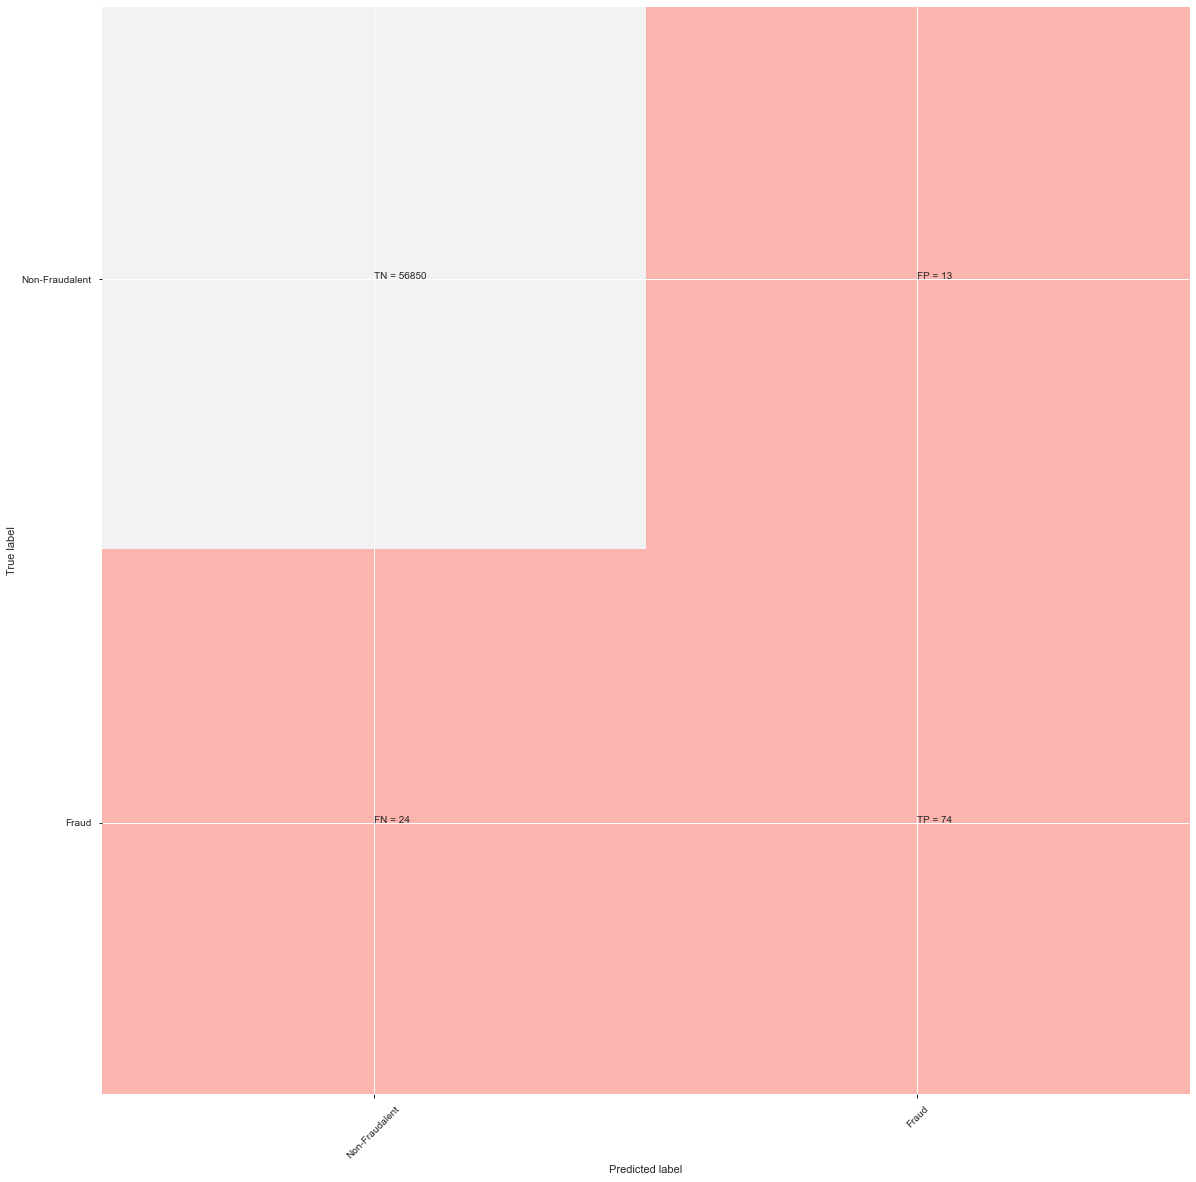

In [112]:
# Printing classification report
labels = ['No Fraud', 'Fraud']
print(classification_report(y_test_pt, y_pred_xg,target_names=labels))
accuracy = metrics.accuracy_score(y_test_pt, y_pred_xg)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )
cm = confusion_matrix(y_test_pt, y_pred_xg)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
classNames = ['Non-Fraudalent','Fraud']
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=10)
plt.show()

In [113]:
print("The recall score for prediction is {:0.2f}".format(recall_score(y_test_pt, y_pred_xg, pos_label = 24)))
print("The prescision score for predion is {:0.2f}".format(precision_score(y_test_pt, y_pred_xg, pos_label = 24)))
print("AUC for testdata:    \t", round(roc_auc_score(y_test_pt, y_pred_xg),5))

The recall score for prediction is 0.76
The prescision score for predion is 0.85
AUC for testdata:    	 0.87744


### SVC

In [114]:
## specify number of folds for k-fold CV
n_folds = 3

## parameters to build the model on
parameters = {'C' : [1,2],
               'gamma':['scale','auto']}

supvm = SVC()
rs_cv_svm = RandomizedSearchCV(estimator=supvm, 
                                param_distributions=parameters, 
                                cv=n_folds, scoring='roc_auc',
                                verbose=5,
                                n_jobs=-1,
                                return_train_score=True,
                                random_state=20)
rs_cv_svm.fit(X_train_ros, y_train_ros)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  12 | elapsed: 199.8min remaining: 99.9min
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed: 252.8min finished


RandomizedSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
                   param_distributions={'C': [1, 2],
                                        'gamma': ['scale', 'auto']},
                   random_state=20, return_train_score=True, scoring='roc_auc',
                   verbose=5)

In [115]:
print("Best Estimator",rs_cv_svm.best_estimator_)
print("Best Accuracy",rs_cv_svm.best_score_)
#print the optimum value of hyperparameters
print("Best Parameters",rs_cv_svm.best_params_)

Best Estimator SVC(C=2, gamma='auto')
Best Accuracy 0.9998102977621226
Best Parameters {'gamma': 'auto', 'C': 2}


### SVC With Optimal Hyperparameters

In [116]:
clf_svm = SVC(C=2,gamma='auto')
clf_svm.fit(X_train_ros, y_train_ros)

SVC(C=2, gamma='auto')

In [117]:
#prediction on the test data
y_pred_svm = clf_svm.predict(X_test_trans)

              precision    recall  f1-score   support

    No Fraud       1.00      1.00      1.00     56863
       Fraud       0.35      0.31      0.33        98

    accuracy                           1.00     56961
   macro avg       0.67      0.65      0.66     56961
weighted avg       1.00      1.00      1.00     56961

Accuracy for the test dataset 99.8%


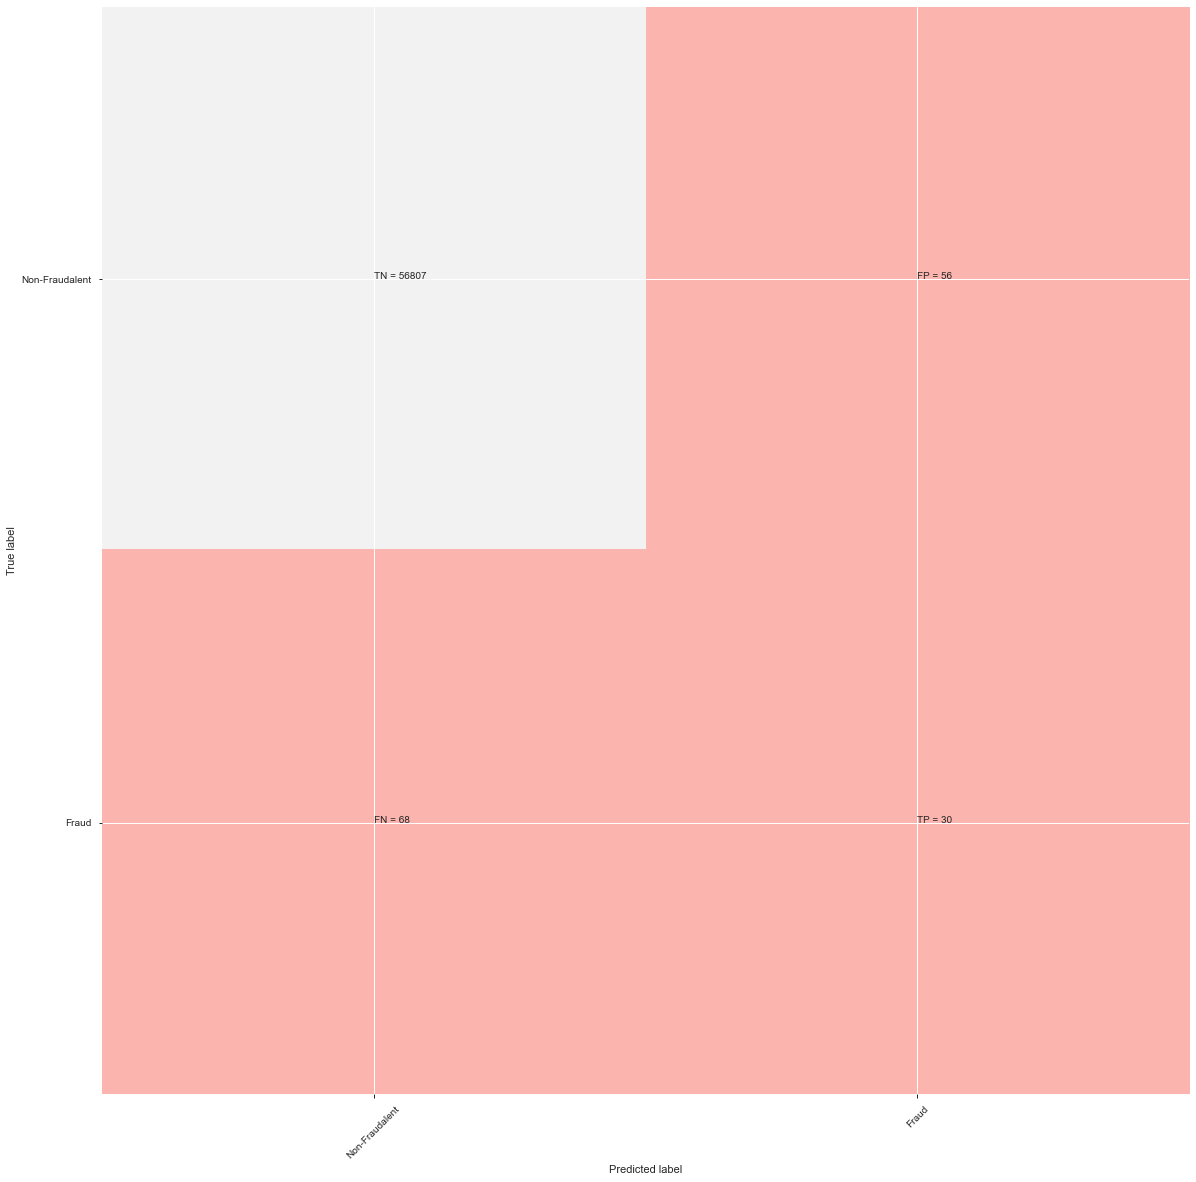

In [118]:
#print the evaluation result by choosing a evaluation metric
# Printing classification reportfrom sklearn.metrics import classification_report
labels = ['No Fraud', 'Fraud']
print(classification_report(y_test_pt, y_pred_svm,target_names=labels))
accuracy = metrics.accuracy_score(y_test_pt, y_pred_svm)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )

cm = confusion_matrix(y_test_pt, y_pred_svm)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
classNames = ['Non-Fraudalent','Fraud']
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=10)
plt.show()

In [119]:
print("The recall score for prediction is {:0.2f}".format(recall_score(y_test_pt, y_pred_svm, pos_label = 24)))
print("The prescision score for predion is {:0.2f}".format(precision_score(y_test_pt, y_pred_svm, pos_label = 24)))
print("AUC for testdata:    \t", round(roc_auc_score(y_test_pt, y_pred_svm),5))

The recall score for prediction is 0.31
The prescision score for predion is 0.35
AUC for testdata:    	 0.65257


### Print the class distribution after applying SMOTE 

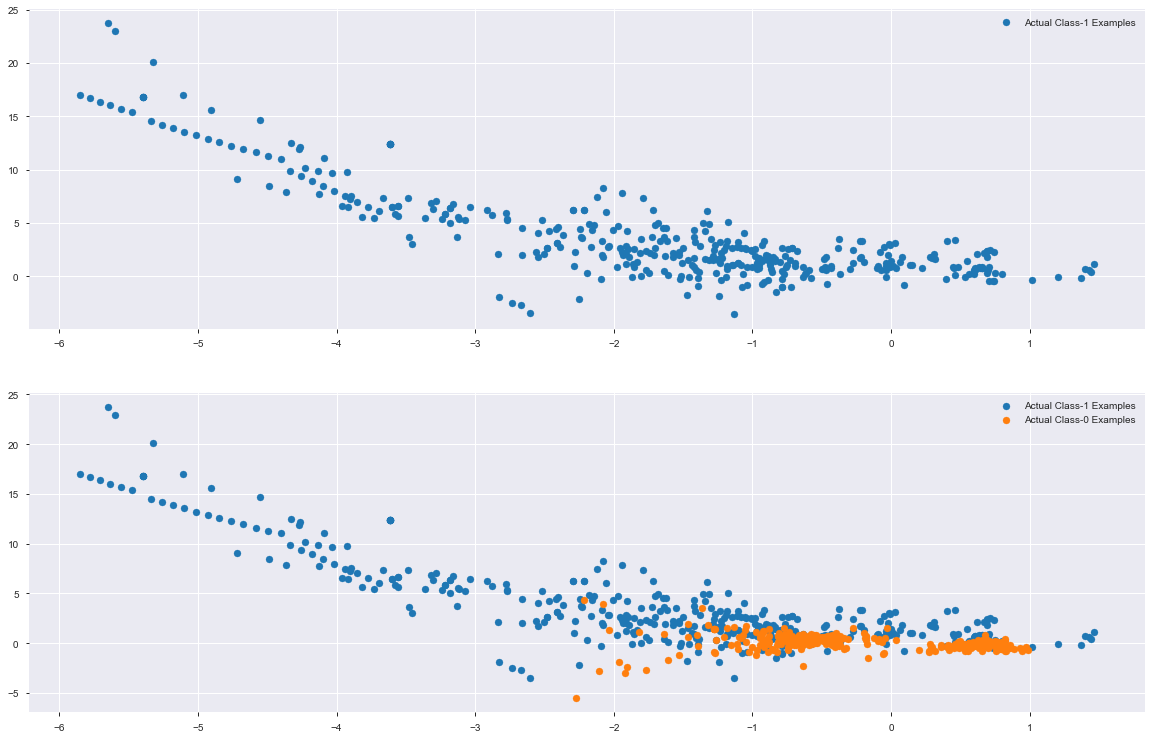

In [120]:
sm = SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train_trans, y_train_pt)
X_train_smote_1 = X_train_smote[X_train_cv.shape[0]:]

X_train_1 = X_train_cv.values[np.where(y_train_cv==1.0)]
X_train_0 = X_train_cv.values[np.where(y_train_cv==0.0)]


import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

### Logistic Regression

In [121]:
num_C = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],'penalty': ['l1','l2']  } #--> list of values
model_logreg = LogisticRegression(n_jobs=-1)
cv_num = RandomizedSearchCV(estimator=model_logreg, 
                                param_distributions=num_C, 
                                cv=3, scoring='roc_auc',
                                verbose=5,
                                n_jobs=-1,
                                return_train_score=True,
                                random_state=100)
cv_num.fit(X_train_smote, y_train_smote)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   12.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   12.0s finished


RandomizedSearchCV(cv=3, estimator=LogisticRegression(n_jobs=-1), n_jobs=-1,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100,
                                              1000],
                                        'penalty': ['l1', 'l2']},
                   random_state=100, return_train_score=True, scoring='roc_auc',
                   verbose=5)

In [122]:
print("Best Estimator",cv_num.best_estimator_)
print("Best Accuracy",cv_num.best_score_)
#print the optimum value of hyperparameters
print("Best Parameters",cv_num.best_params_)

Best Estimator LogisticRegression(C=0.1, n_jobs=-1)
Best Accuracy 0.9849365367687676
Best Parameters {'penalty': 'l2', 'C': 0.1}


### Logistic Regression With Optimum Hyperparameters

In [123]:
clf_logreg = LogisticRegression(n_jobs=-1,C=0.1,penalty='l2')
clf_logreg.fit(X_train_smote, y_train_smote)

LogisticRegression(C=0.1, n_jobs=-1)

In [124]:
y_pred = clf_logreg.predict(X_test_trans)

              precision    recall  f1-score   support

    No Fraud       1.00      0.95      0.98     56863
       Fraud       0.03      0.91      0.06        98

    accuracy                           0.95     56961
   macro avg       0.52      0.93      0.52     56961
weighted avg       1.00      0.95      0.97     56961

Accuracy for the test dataset 95.2%


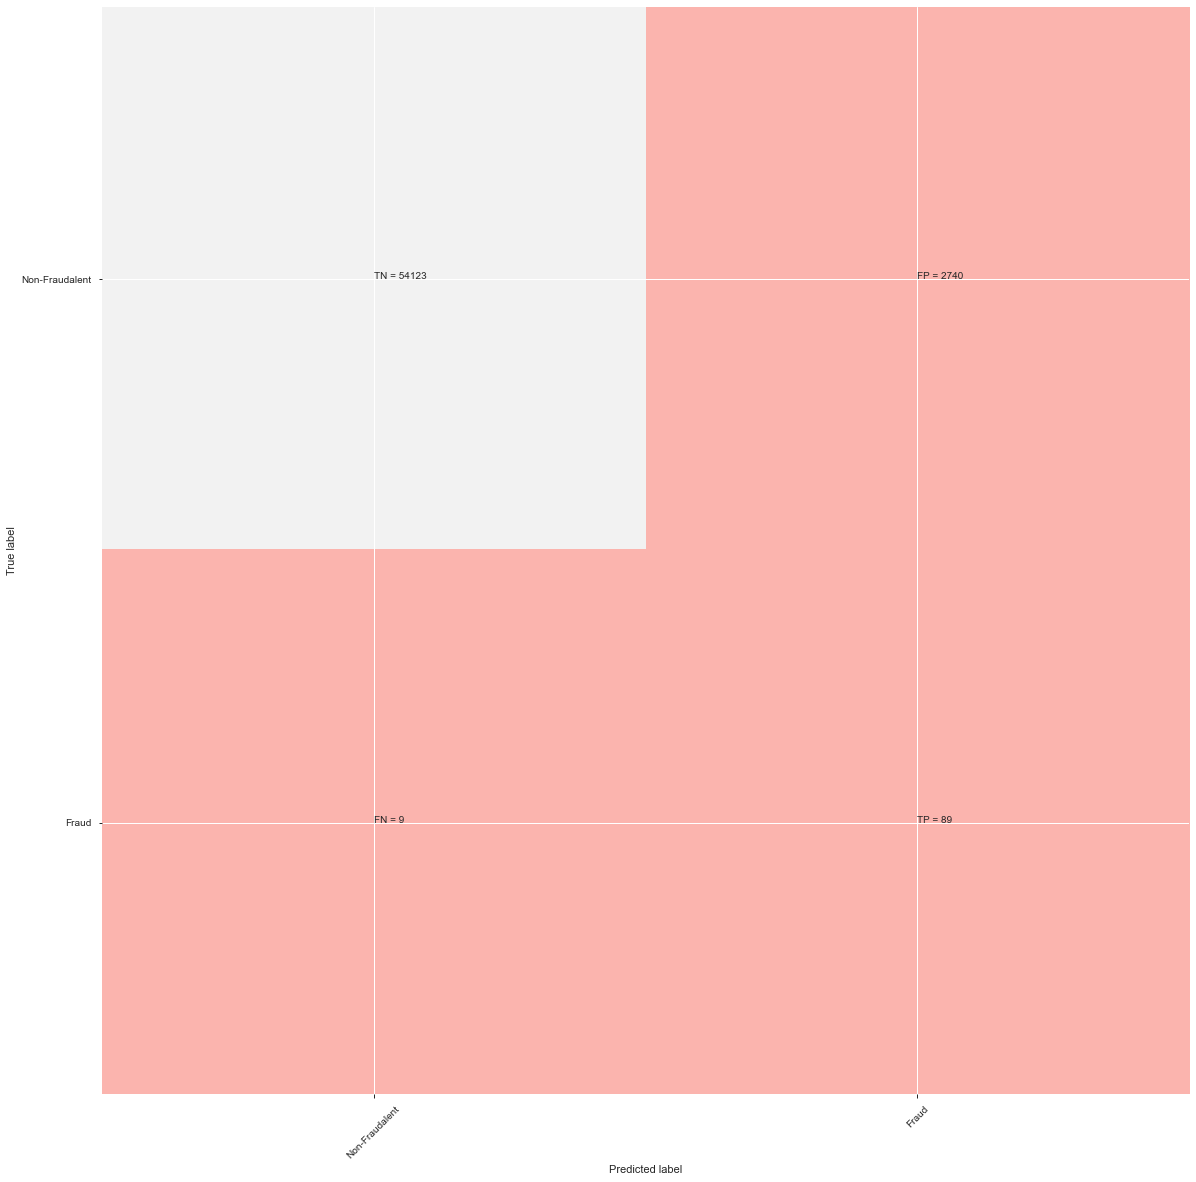

In [125]:
#print the evaluation result by choosing a evaluation metric
# Printing classification report
labels = ['No Fraud', 'Fraud']
print(classification_report(y_test_pt, y_pred, target_names=labels))
accuracy = metrics.accuracy_score(y_test_pt, y_pred)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )

cm = confusion_matrix(y_test_pt, y_pred)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
classNames = ['Non-Fraudalent','Fraud']
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=10)
plt.show()

In [126]:
print("The recall score for prediction is {:0.2f}".format(recall_score(y_test_pt, y_pred, pos_label = 24)))
print("The prescision score for predion is {:0.2f}".format(precision_score(y_test_pt, y_pred, pos_label = 24)))
print("AUC for testdata:    \t", roc_auc_score(y_test_pt, y_pred,average="macro"))

The recall score for prediction is 0.91
The prescision score for predion is 0.03
AUC for testdata:    	 0.9299886372078684


### Decision Tree

In [127]:
# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'max_depth': range(1, 20),
              'min_samples_leaf': range(30, 100, 50),
              'min_samples_split': range(5, 100, 50),
              'criterion': ["entropy", "gini"]}

dtree = DecisionTreeClassifier()
rs_cv = RandomizedSearchCV(estimator=dtree, 
                                param_distributions=parameters, 
                                cv=n_folds, scoring='roc_auc',
                                verbose=5,
                                n_jobs=-1,
                                return_train_score=True,
                                random_state=100)
rs_cv.fit(X_train_smote, y_train_smote)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   25.7s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.5min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.5min finished


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': range(1, 20),
                                        'min_samples_leaf': range(30, 100, 50),
                                        'min_samples_split': range(5, 100, 50)},
                   random_state=100, return_train_score=True, scoring='roc_auc',
                   verbose=5)

In [128]:
print("Best Estimator",rs_cv.best_estimator_)
print("Best Accuracy",rs_cv.best_score_)
#print the optimum value of hyperparameters
print("Best Parameters",rs_cv.best_params_)

Best Estimator DecisionTreeClassifier(criterion='entropy', max_depth=14, min_samples_leaf=80,
                       min_samples_split=5)
Best Accuracy 0.9983087991213804
Best Parameters {'min_samples_split': 5, 'min_samples_leaf': 80, 'max_depth': 14, 'criterion': 'entropy'}


In [129]:
clf_dtree = DecisionTreeClassifier(min_samples_split=5,min_samples_leaf=80,max_depth=14,criterion='entropy')
clf_dtree.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(criterion='entropy', max_depth=14, min_samples_leaf=80,
                       min_samples_split=5)

In [130]:
#prediction on the test data
y_pred_tree = clf_dtree.predict(X_test_trans)

              precision    recall  f1-score   support

    No Fraud       1.00      0.98      0.99     56863
       Fraud       0.05      0.78      0.10        98

    accuracy                           0.97     56961
   macro avg       0.53      0.88      0.54     56961
weighted avg       1.00      0.97      0.99     56961

Accuracy for the test dataset 97.5%


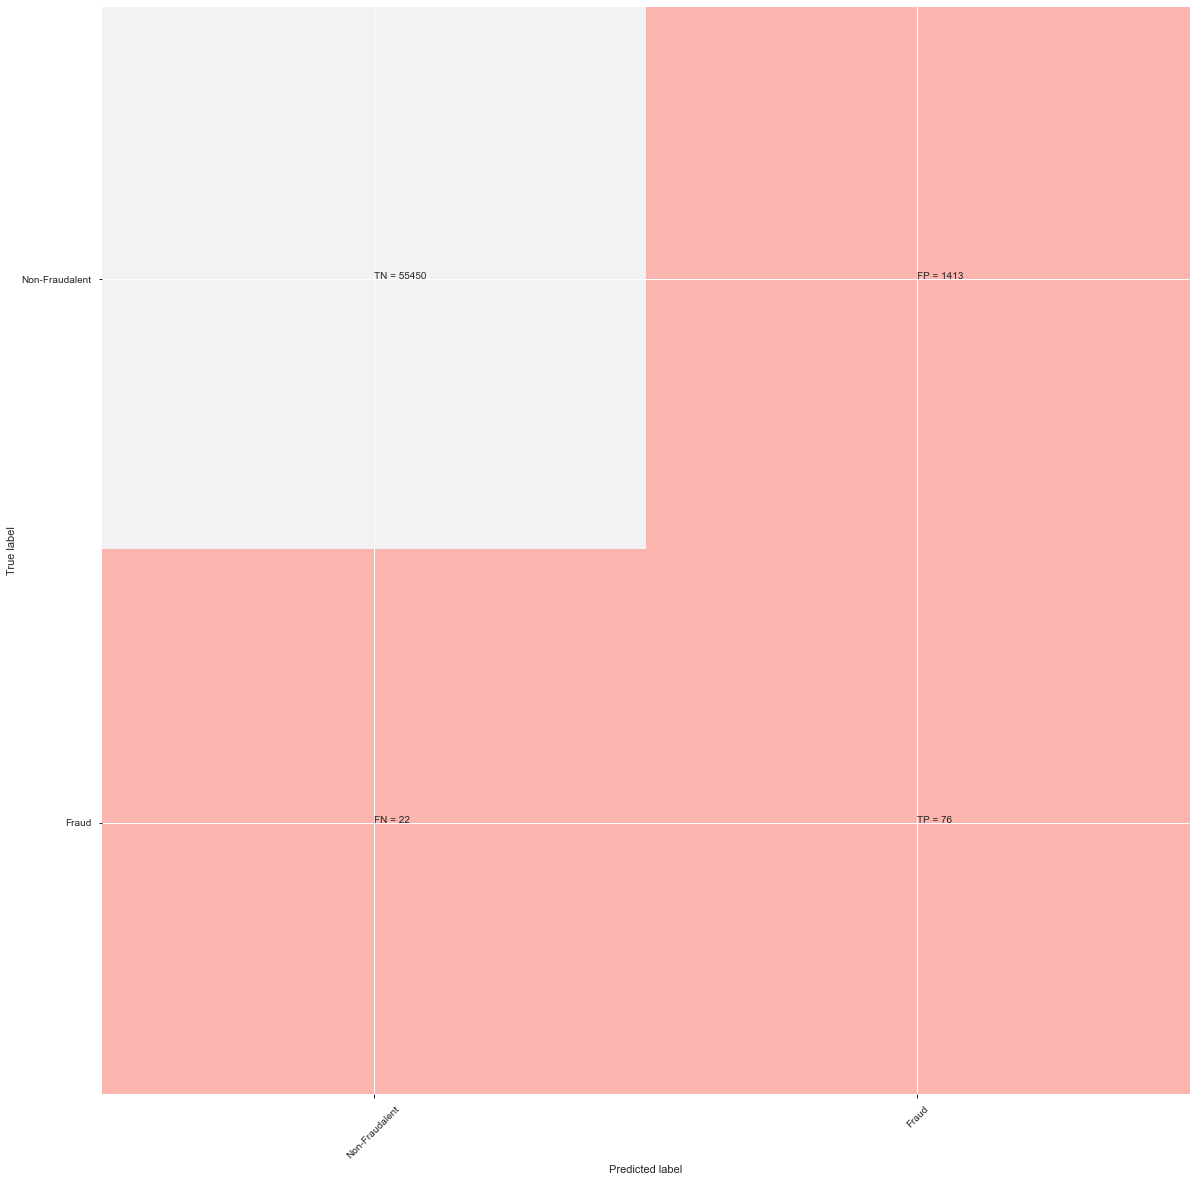

In [131]:
#print the evaluation result by choosing a evaluation metric
# Printing classification report
labels = ['No Fraud', 'Fraud']
print(classification_report(y_test_pt, y_pred_tree,target_names=labels))
accuracy = metrics.accuracy_score(y_test_pt, y_pred_tree)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )

cm = confusion_matrix(y_test_pt, y_pred_tree)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
classNames = ['Non-Fraudalent','Fraud']
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=10)
plt.show()

In [132]:
print("The recall score for prediction is {:0.2f}".format(recall_score(y_test_pt, y_pred_tree, pos_label = 24)))
print("The prescision score for predion is {:0.2f}".format(precision_score(y_test_pt, y_pred_tree, pos_label = 24)))
print("AUC for testdata:    \t", round(roc_auc_score(y_test_pt, y_pred_tree),5))

The recall score for prediction is 0.78
The prescision score for predion is 0.05
AUC for testdata:    	 0.87533


### Random Forest

In [133]:
## specify number of folds for k-fold CV
n_folds = 3

## parameters to build the model on
parameters = {'n_estimators': range(10, 300, 50),
               'max_depth': range(2, 20, 10),
               'min_samples_leaf': range(10, 100, 25),
               'min_samples_split': range(10, 100, 25),
               'max_features': range(2,50,10)}

rf = RandomForestClassifier()
rs_cv_rf = RandomizedSearchCV(estimator=rf, 
                                param_distributions=parameters, 
                                cv=n_folds, scoring='roc_auc',
                                verbose=5,
                                n_jobs=-1,
                                return_train_score=True,
                                random_state=100)
rs_cv_rf.fit(X_train_smote, y_train_smote)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed: 18.9min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 51.8min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 51.8min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': range(2, 20, 10),
                                        'max_features': range(2, 50, 10),
                                        'min_samples_leaf': range(10, 100, 25),
                                        'min_samples_split': range(10, 100, 25),
                                        'n_estimators': range(10, 300, 50)},
                   random_state=100, return_train_score=True, scoring='roc_auc',
                   verbose=5)

In [134]:
print("Best Estimator",rs_cv_rf.best_estimator_)
print("Best Accuracy",rs_cv_rf.best_score_)
#print the optimum value of hyperparameters
print("Best  HyperParameters",rs_cv_rf.best_params_)

Best Estimator RandomForestClassifier(max_depth=12, max_features=12, min_samples_leaf=10,
                       min_samples_split=10, n_estimators=210)
Best Accuracy 0.9997829857657669
Best  HyperParameters {'n_estimators': 210, 'min_samples_split': 10, 'min_samples_leaf': 10, 'max_features': 12, 'max_depth': 12}


### Random Forest With Optimal Hyperparameters

In [135]:
clf_rf = RandomForestClassifier(n_estimators=210, min_samples_split=10, min_samples_leaf=10, max_features=12, max_depth=12)
clf_rf.fit(X_train_smote, y_train_smote)

RandomForestClassifier(max_depth=12, max_features=12, min_samples_leaf=10,
                       min_samples_split=10, n_estimators=210)

In [136]:
#prediction on the test data
y_pred_rf = clf_rf.predict(X_test_trans)

              precision    recall  f1-score   support

    No Fraud       1.00      1.00      1.00     56863
       Fraud       0.42      0.74      0.54        98

    accuracy                           1.00     56961
   macro avg       0.71      0.87      0.77     56961
weighted avg       1.00      1.00      1.00     56961

Accuracy for the test dataset 99.8%


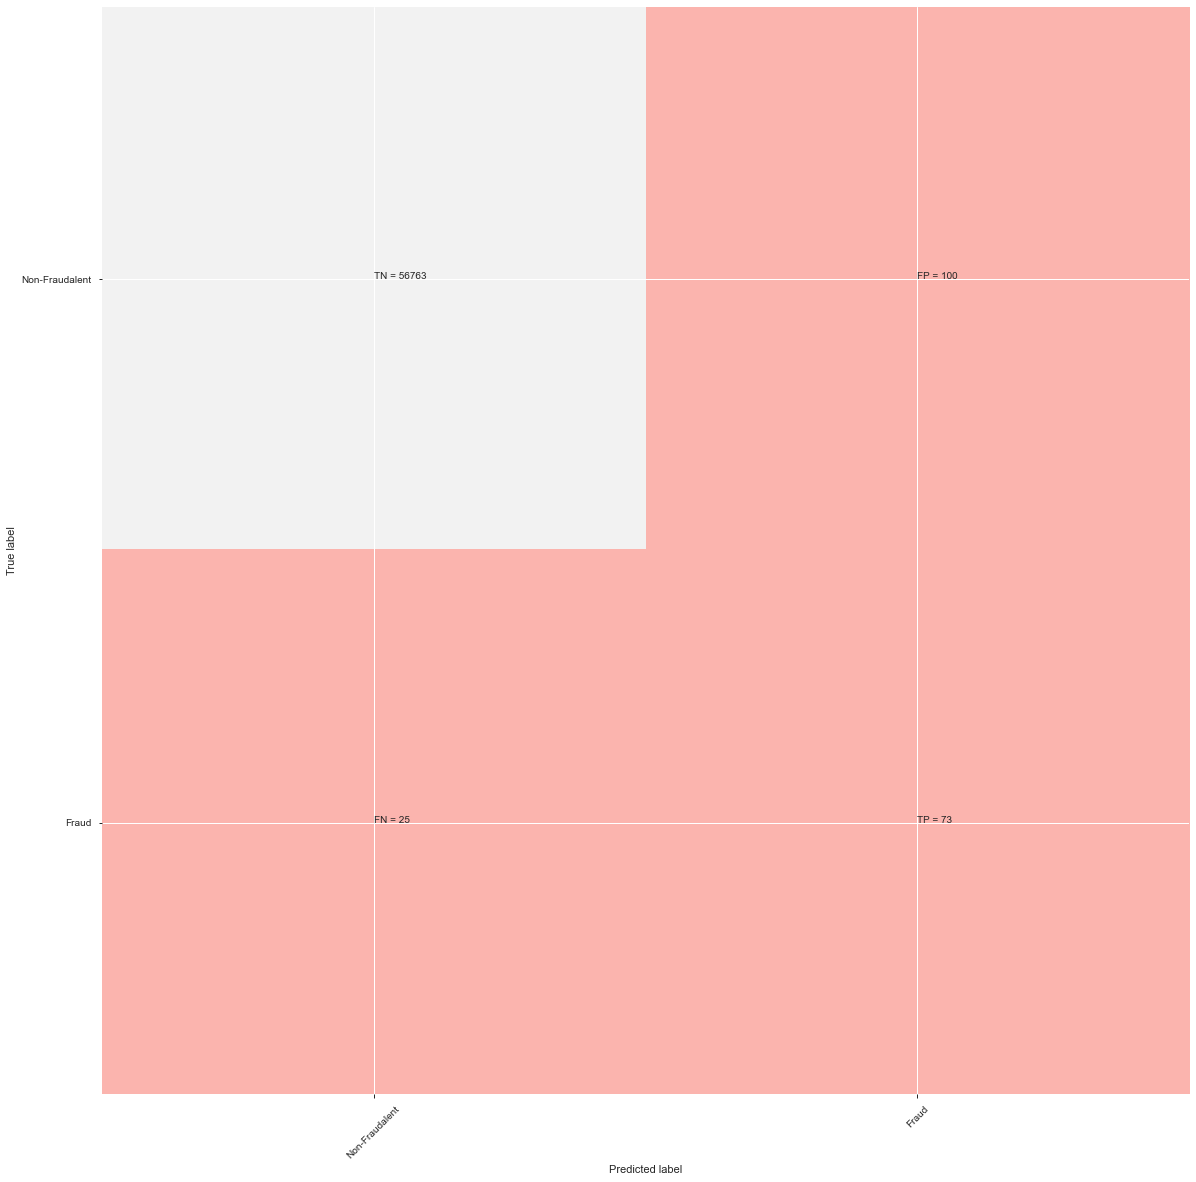

In [137]:
#print the evaluation result by choosing a evaluation metric
# Printing classification report
labels = ['No Fraud', 'Fraud']
print(classification_report(y_test_pt, y_pred_rf,target_names=labels))
accuracy = metrics.accuracy_score(y_test_pt, y_pred_rf)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )

cm = confusion_matrix(y_test_pt, y_pred_rf)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
classNames = ['Non-Fraudalent','Fraud']
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=10)
plt.show()

In [138]:
print("The recall score for prediction is {:0.2f}".format(recall_score(y_test_pt, y_pred_rf, pos_label = 24)))
print("The prescision score for predion is {:0.2f}".format(precision_score(y_test_pt, y_pred_rf, pos_label = 24)))
print("AUC for testdata:    \t", round(roc_auc_score(y_test_pt, y_pred_rf),5))

The recall score for prediction is 0.74
The prescision score for predion is 0.42
AUC for testdata:    	 0.87157


### XGBoost

In [139]:
## specify number of folds for k-fold CV
n_folds = 3

## parameters to build the model on
parameters = {'n_estimators': range(10, 1000, 200),
               'max_depth': range(5, 50, 5),
               'learning_rate' : [0.1,0.01,0.0001,0.00001],
               'gamma':[i/10.0 for i in range(0,5)],
               'subsample':[0.5,0.6,0.7] ,
               'colsample_bytree':[0.5,0.6,0.7]
                }

xg = XGBClassifier()
rs_cv_xg = RandomizedSearchCV(estimator=xg, 
                                param_distributions=parameters, 
                                cv=n_folds, scoring='roc_auc',
                                verbose=5,
                                n_jobs=-1,
                                return_train_score=True,
                                random_state=20)
rs_cv_xg.fit(X_train_smote, y_train_smote)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed: 46.5min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 130.9min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 130.9min finished


RandomizedSearchCV(cv=3, estimator=XGBClassifier(), n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.5, 0.6, 0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.1, 0.01, 0.0001,
                                                          1e-05],
                                        'max_depth': range(5, 50, 5),
                                        'n_estimators': range(10, 1000, 200),
                                        'subsample': [0.5, 0.6, 0.7]},
                   random_state=20, return_train_score=True, scoring='roc_auc',
                   verbose=5)

In [140]:
print("Best Estimator",rs_cv_xg.best_estimator_)
print("Best Accuracy",rs_cv_xg.best_score_)
#print the optimum value of hyperparameters
print("Best HyperParameters",rs_cv_xg.best_params_)

Best Estimator XGBClassifier(colsample_bytree=0.7, gamma=0.3, max_depth=20, n_estimators=210,
              subsample=0.5)
Best Accuracy 0.999891850954786
Best HyperParameters {'subsample': 0.5, 'n_estimators': 210, 'max_depth': 20, 'learning_rate': 0.1, 'gamma': 0.3, 'colsample_bytree': 0.7}


### XGBoost With Optimal HyperParameters

In [141]:
clf_xg = XGBClassifier(subsample= 0.5, n_estimators= 810, max_depth=20, learning_rate= 0.1, gamma= 0.2, colsample_bytree= 0.7)
clf_xg.fit(X_train_smote, y_train_smote)

XGBClassifier(colsample_bytree=0.7, gamma=0.2, max_depth=20, n_estimators=810,
              subsample=0.5)

In [142]:
#prediction on the test data
y_pred_xg = clf_xg.predict(X_test_trans)

              precision    recall  f1-score   support

    No Fraud       1.00      1.00      1.00     56863
       Fraud       0.48      0.76      0.59        98

    accuracy                           1.00     56961
   macro avg       0.74      0.88      0.79     56961
weighted avg       1.00      1.00      1.00     56961

Accuracy for the test dataset 99.8%


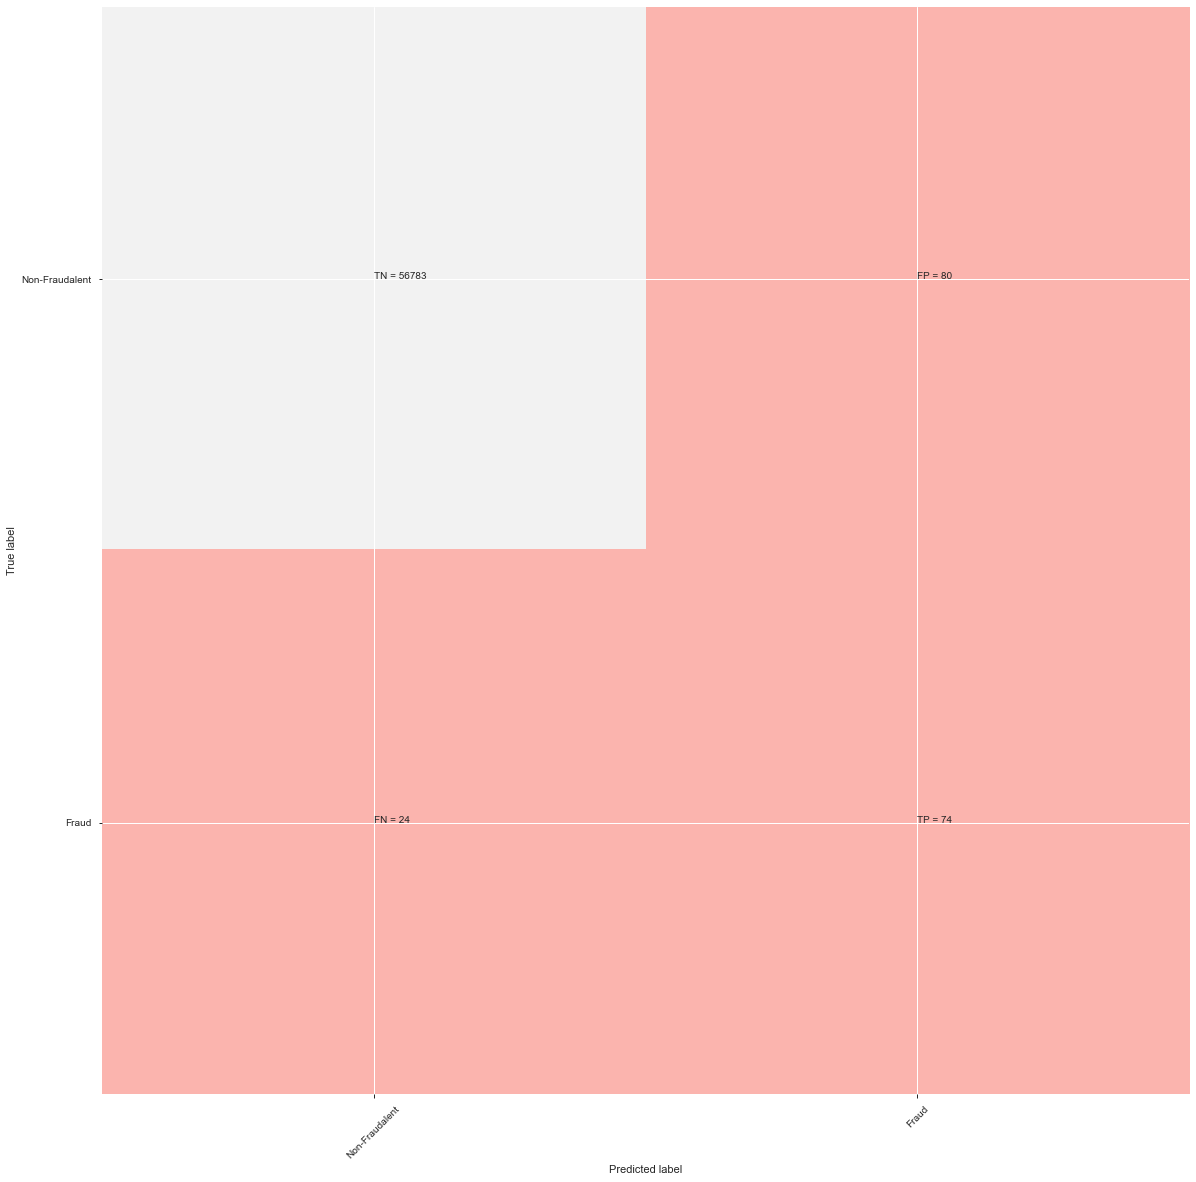

In [143]:
# Printing classification report
from sklearn.metrics import classification_report
labels = ['No Fraud', 'Fraud']
print(classification_report(y_test_pt, y_pred_xg,target_names=labels))
accuracy = metrics.accuracy_score(y_test_pt, y_pred_xg)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )
cm = confusion_matrix(y_test_pt, y_pred_xg)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
classNames = ['Non-Fraudalent','Fraud']
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=10)
plt.show()

In [144]:
print("The recall score for prediction is {:0.2f}".format(recall_score(y_test_pt, y_pred_xg, pos_label = 24)))
print("The prescision score for predion is {:0.2f}".format(precision_score(y_test_pt, y_pred_xg, pos_label = 24)))
print("AUC for testdata:    \t", round(roc_auc_score(y_test_pt, y_pred_xg),5))

The recall score for prediction is 0.76
The prescision score for predion is 0.48
AUC for testdata:    	 0.87685


### SVC

In [145]:
## specify number of folds for k-fold CV
n_folds = 3

## parameters to build the model on
parameters = {'C' : [1,2],
               'gamma':['scale','auto']}

supvm = SVC()
rs_cv_svm = RandomizedSearchCV(estimator=supvm, 
                                param_distributions=parameters, 
                                cv=n_folds, scoring='roc_auc',
                                verbose=5,
                                n_jobs=-1,
                                return_train_score=True,
                                random_state=20)
rs_cv_svm.fit(X_train_smote, y_train_smote)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  12 | elapsed: 58.5min remaining: 29.2min
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed: 71.5min finished


RandomizedSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
                   param_distributions={'C': [1, 2],
                                        'gamma': ['scale', 'auto']},
                   random_state=20, return_train_score=True, scoring='roc_auc',
                   verbose=5)

In [146]:
print("Best Estimator",rs_cv_svm.best_estimator_)
print("Best Accuracy",rs_cv_svm.best_score_)
#print the optimum value of hyperparameters
print("Best Parameters",rs_cv_svm.best_params_)

Best Estimator SVC(C=2, gamma='auto')
Best Accuracy 0.9999218960715766
Best Parameters {'gamma': 'auto', 'C': 2}


### SVC With Optimal Hyperparameters

In [147]:
clf_svm = SVC(C=2,gamma='auto')
clf_svm.fit(X_train_smote, y_train_smote)

SVC(C=2, gamma='auto')

In [148]:
#prediction on the test data
y_pred_svm = clf_svm.predict(X_test_trans)

              precision    recall  f1-score   support

    No Fraud       1.00      1.00      1.00     56863
       Fraud       0.29      0.26      0.27        98

    accuracy                           1.00     56961
   macro avg       0.64      0.63      0.63     56961
weighted avg       1.00      1.00      1.00     56961

Accuracy for the test dataset 99.8%


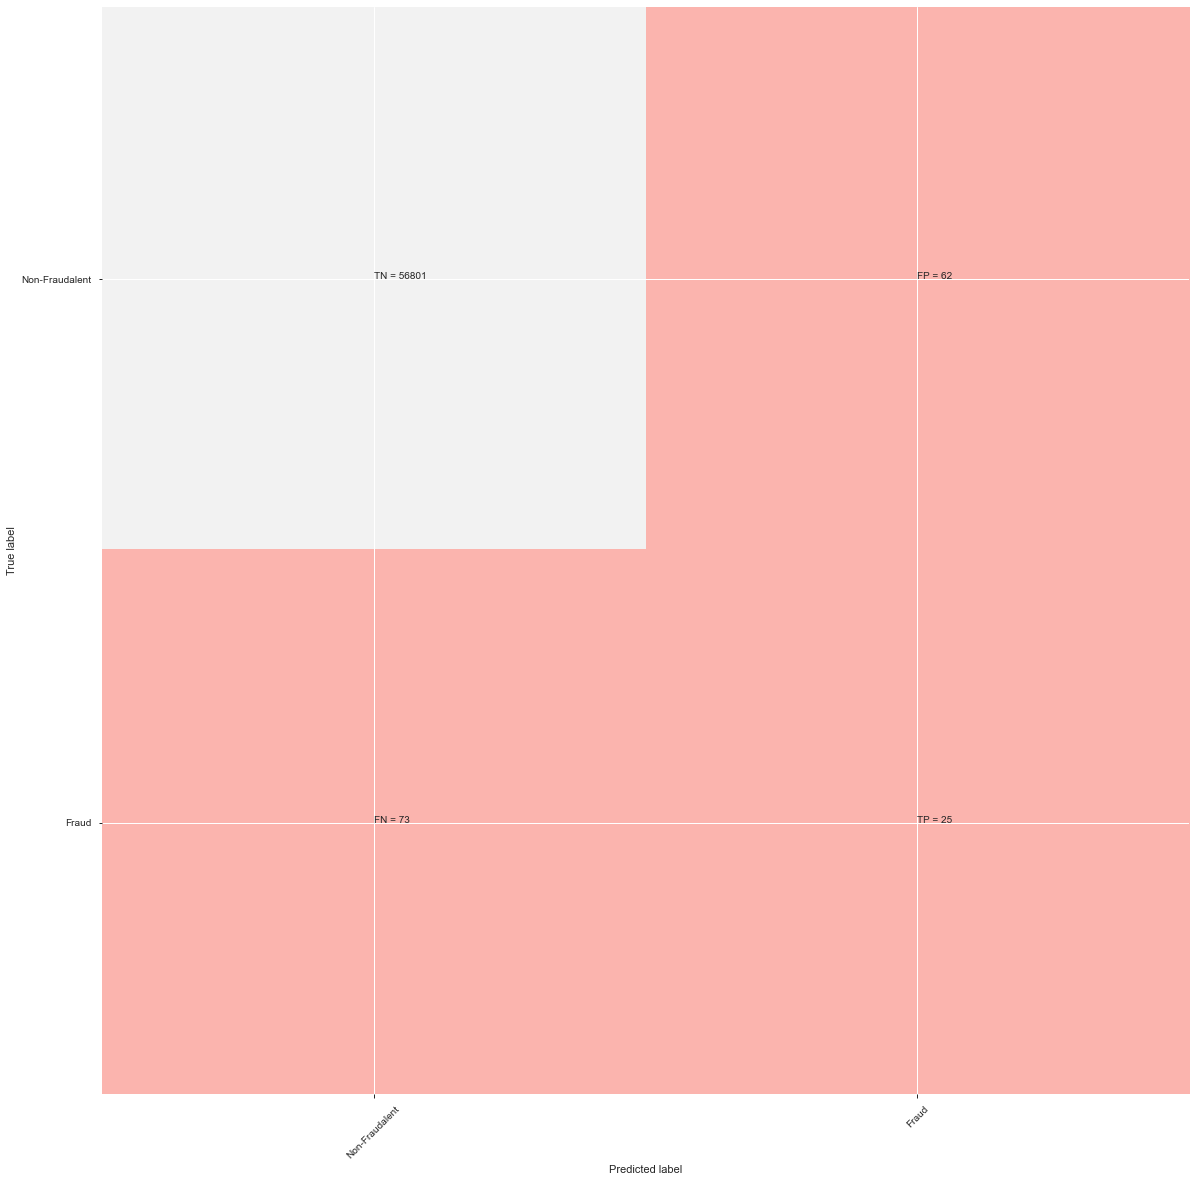

In [149]:
#print the evaluation result by choosing a evaluation metric
# Printing classification reportfrom sklearn.metrics import classification_report
labels = ['No Fraud', 'Fraud']
print(classification_report(y_test_pt, y_pred_svm,target_names=labels))
accuracy = metrics.accuracy_score(y_test_pt, y_pred_svm)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )

cm = confusion_matrix(y_test_pt, y_pred_svm)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
classNames = ['Non-Fraudalent','Fraud']
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=10)
plt.show()

In [150]:
print("The recall score for prediction is {:0.2f}".format(recall_score(y_test_pt, y_pred_svm, pos_label = 24)))
print("The prescision score for predion is {:0.2f}".format(precision_score(y_test_pt, y_pred_svm, pos_label = 24)))
print("AUC for testdata:    \t", round(roc_auc_score(y_test_pt, y_pred_svm),5))

The recall score for prediction is 0.26
The prescision score for predion is 0.29
AUC for testdata:    	 0.62701


##### Build models on other algorithms to see the better performing on SMOTE

### Print the class distribution after applying ADASYN

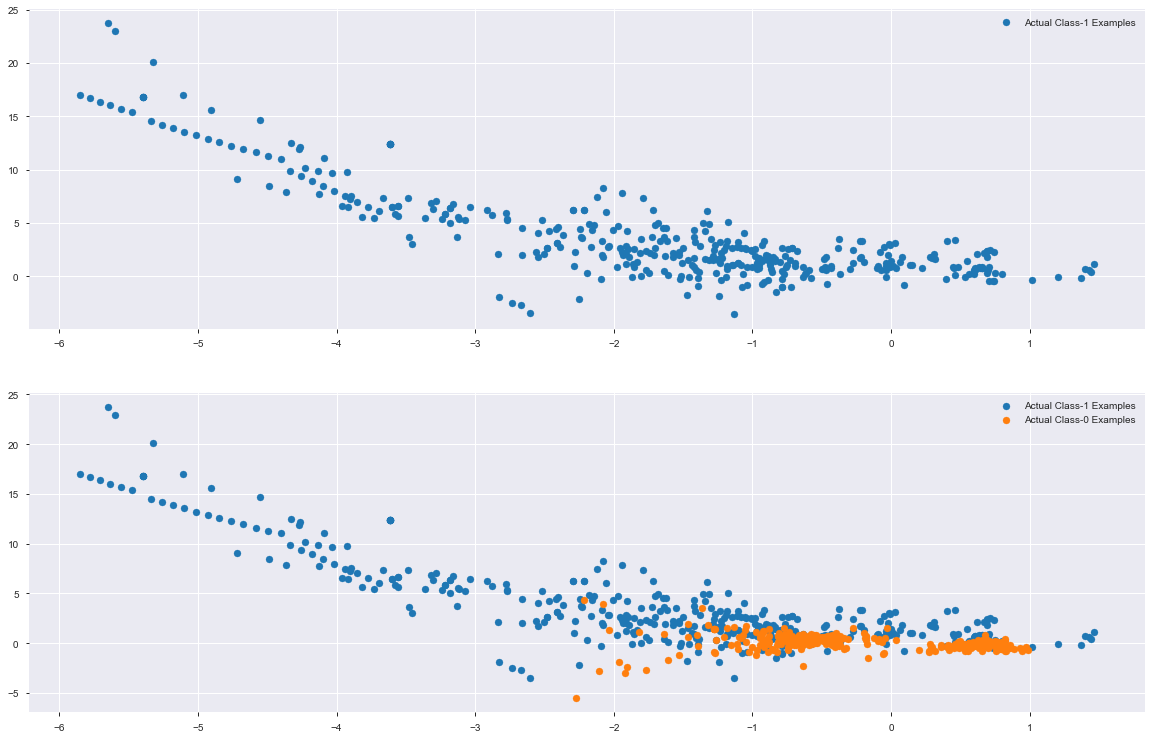

In [151]:
ada = ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train_trans, y_train_pt)
X_train_adasyn_1 = X_train_adasyn[X_train_cv.shape[0]:]

X_train_1 = X_train_cv.values[np.where(y_train_cv==1.0)]
X_train_0 = X_train_cv.values[np.where(y_train_cv==0.0)]


import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

##### Build models on other algorithms to see the better performing on ADASYN

### Logistic Regression

In [152]:
num_C = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],'penalty': ['l1','l2']  } #--> list of values
model_logreg = LogisticRegression(n_jobs=-1)
cv_num = RandomizedSearchCV(estimator=model_logreg, 
                                param_distributions=num_C, 
                                cv=3, scoring='roc_auc',
                                verbose=5,
                                n_jobs=-1,
                                return_train_score=True,
                                random_state=100)
cv_num.fit(X_train_adasyn, y_train_adasyn)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   11.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   11.5s finished


RandomizedSearchCV(cv=3, estimator=LogisticRegression(n_jobs=-1), n_jobs=-1,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100,
                                              1000],
                                        'penalty': ['l1', 'l2']},
                   random_state=100, return_train_score=True, scoring='roc_auc',
                   verbose=5)

In [153]:
print("Best Estimator",cv_num.best_estimator_)
print("Best Accuracy",cv_num.best_score_)
#print the optimum value of hyperparameters
print("Best Parameters",cv_num.best_params_)

Best Estimator LogisticRegression(C=0.1, n_jobs=-1)
Best Accuracy 0.9316233995835136
Best Parameters {'penalty': 'l2', 'C': 0.1}


### Logistic Regression With Optimal Hyperparameters

In [154]:
clf_logreg = LogisticRegression(n_jobs=-1,C=0.1,penalty='l2')
clf_logreg.fit(X_train_adasyn, y_train_adasyn)

LogisticRegression(C=0.1, n_jobs=-1)

In [155]:
y_pred = clf_logreg.predict(X_test_trans)

              precision    recall  f1-score   support

    No Fraud       1.00      0.87      0.93     56863
       Fraud       0.01      0.92      0.02        98

    accuracy                           0.87     56961
   macro avg       0.51      0.89      0.48     56961
weighted avg       1.00      0.87      0.93     56961

Accuracy for the test dataset 87.0%


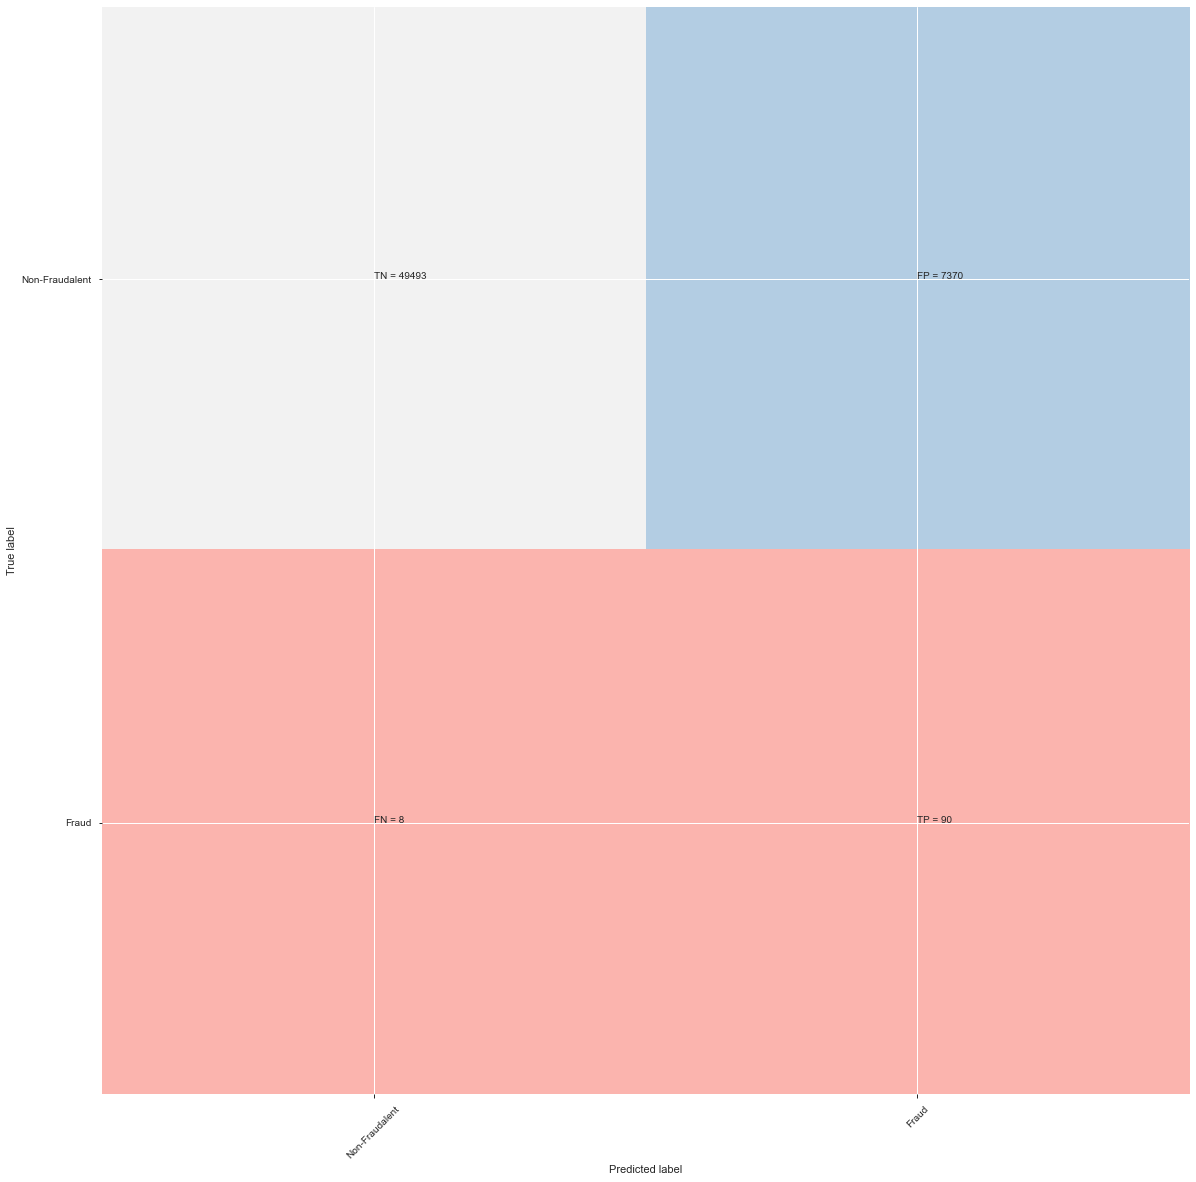

In [156]:
#print the evaluation result by choosing a evaluation metric
# Printing classification report
labels = ['No Fraud', 'Fraud']
print(classification_report(y_test_pt, y_pred, target_names=labels))
accuracy = metrics.accuracy_score(y_test_pt, y_pred)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )

cm = confusion_matrix(y_test_pt, y_pred)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
classNames = ['Non-Fraudalent','Fraud']
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=10)
plt.show()

In [157]:
print("The recall score for prediction is {:0.2f}".format(recall_score(y_test_pt, y_pred, pos_label = 24)))
print("The prescision score for predion is {:0.2f}".format(precision_score(y_test_pt, y_pred, pos_label = 24)))
print("AUC for testdata:    \t", roc_auc_score(y_test_pt, y_pred,average="macro"))

The recall score for prediction is 0.92
The prescision score for predion is 0.01
AUC for testdata:    	 0.8943787915602377


### Decision Tree

In [158]:
# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'max_depth': range(1, 50,5),
              'min_samples_leaf': range(5, 1000, 50),
              'min_samples_split': range(5, 1000, 50),
              'criterion': ["entropy", "gini"]}

dtree = DecisionTreeClassifier()
rs_cv = RandomizedSearchCV(estimator=dtree, 
                                param_distributions=parameters, 
                                cv=n_folds, scoring='roc_auc',
                                verbose=5,
                                n_jobs=-1,
                                return_train_score=True,
                                random_state=100)
rs_cv.fit(X_train_adasyn, y_train_adasyn)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   45.7s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.6min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.6min finished


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': range(1, 50, 5),
                                        'min_samples_leaf': range(5, 1000, 50),
                                        'min_samples_split': range(5, 1000, 50)},
                   random_state=100, return_train_score=True, scoring='roc_auc',
                   verbose=5)

In [159]:
print("Best Estimator",rs_cv.best_estimator_)
print("Best Accuracy",rs_cv.best_score_)
#print the optimum value of hyperparameters
print("Best Parameters",rs_cv.best_params_)

Best Estimator DecisionTreeClassifier(criterion='entropy', max_depth=46, min_samples_leaf=805,
                       min_samples_split=355)
Best Accuracy 0.9496221649292153
Best Parameters {'min_samples_split': 355, 'min_samples_leaf': 805, 'max_depth': 46, 'criterion': 'entropy'}


In [160]:
clf_dtree = DecisionTreeClassifier(min_samples_split=355,min_samples_leaf=805,max_depth=46,criterion='entropy')
clf_dtree.fit(X_train_adasyn, y_train_adasyn)

DecisionTreeClassifier(criterion='entropy', max_depth=46, min_samples_leaf=805,
                       min_samples_split=355)

In [161]:
#prediction on the test data
y_pred_tree = clf_dtree.predict(X_test_trans)

              precision    recall  f1-score   support

    No Fraud       1.00      0.94      0.97     56863
       Fraud       0.02      0.86      0.04        98

    accuracy                           0.94     56961
   macro avg       0.51      0.90      0.51     56961
weighted avg       1.00      0.94      0.97     56961

Accuracy for the test dataset 93.7%


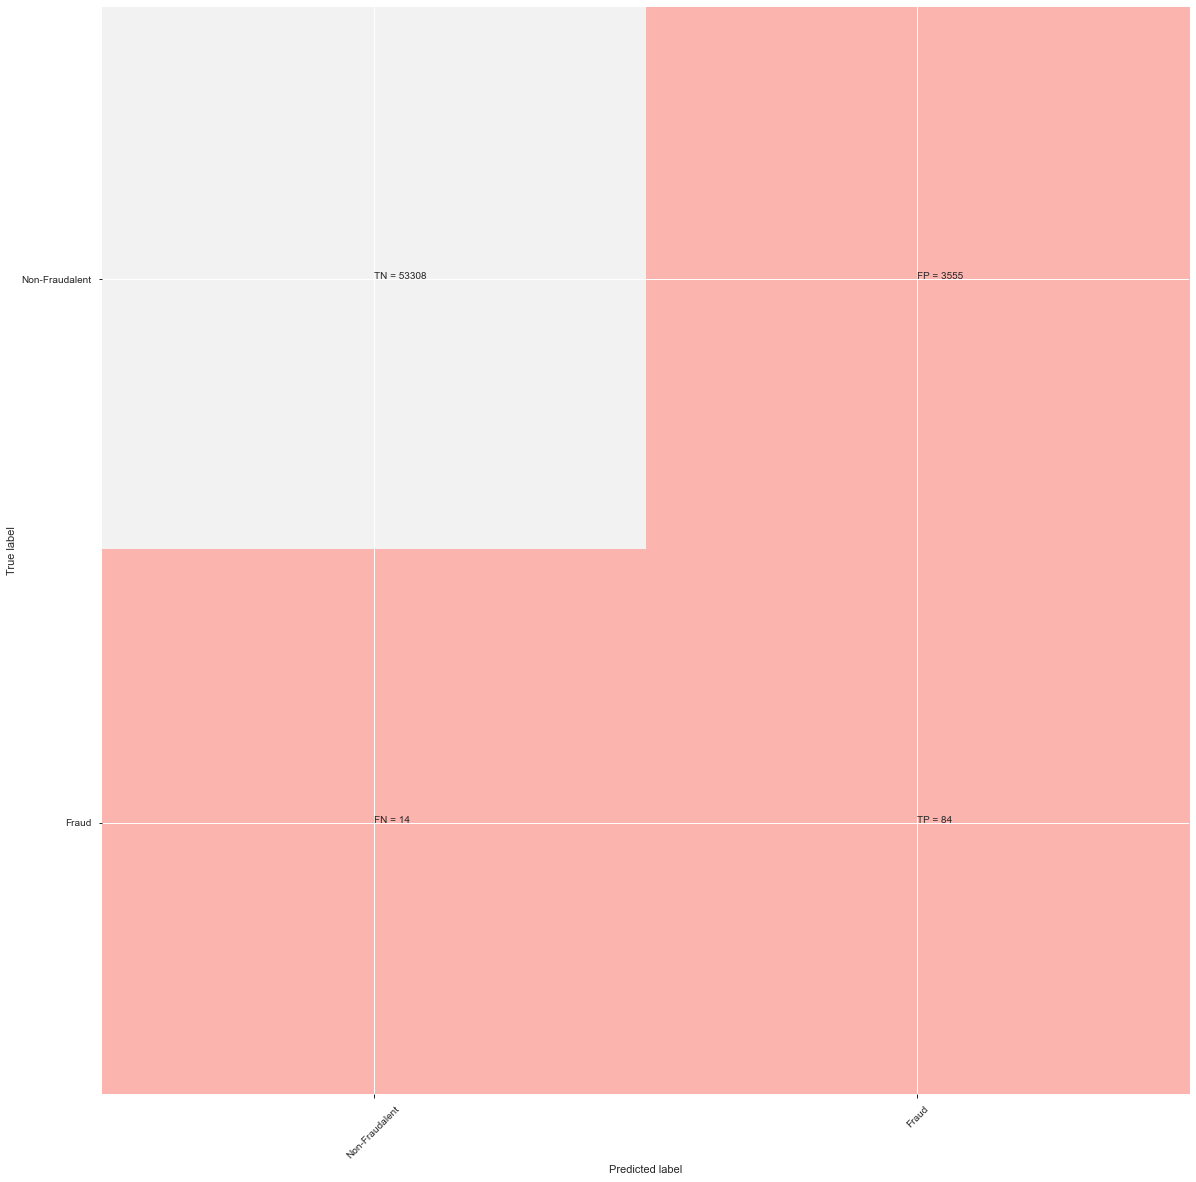

In [162]:
# Printing classification report
labels = ['No Fraud', 'Fraud']
print(classification_report(y_test_pt, y_pred_tree,target_names=labels))
accuracy = metrics.accuracy_score(y_test_pt, y_pred_tree)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )

cm = confusion_matrix(y_test_pt, y_pred_tree)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
classNames = ['Non-Fraudalent','Fraud']
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=10)
plt.show()

In [163]:
print("The recall score for prediction is {:0.2f}".format(recall_score(y_test_pt, y_pred_tree, pos_label = 24)))
print("The prescision score for predion is {:0.2f}".format(precision_score(y_test_pt, y_pred_tree, pos_label = 24)))
print("AUC for testdata:    \t", round(roc_auc_score(y_test_pt, y_pred_tree),5))

The recall score for prediction is 0.86
The prescision score for predion is 0.02
AUC for testdata:    	 0.89731


### Random Forest

In [164]:
## specify number of folds for k-fold CV
n_folds = 3

## parameters to build the model on
parameters = {'n_estimators': range(10, 2000, 500),
               'max_depth': range(2, 20, 10),
               'min_samples_leaf': range(10, 1000, 100),
               'min_samples_split': range(10, 1000, 100),
               'max_features': range(2,50,10)}

rf = RandomForestClassifier()
rs_cv_rf = RandomizedSearchCV(estimator=rf, 
                                param_distributions=parameters, 
                                cv=n_folds, scoring='roc_auc',
                                verbose=5,
                                n_jobs=-1,
                                return_train_score=True,
                                random_state=100)
rs_cv_rf.fit(X_train_adasyn, y_train_adasyn)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  9.5min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  9.5min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': range(2, 20, 10),
                                        'max_features': range(2, 50, 10),
                                        'min_samples_leaf': range(10, 1000, 100),
                                        'min_samples_split': range(10, 1000, 100),
                                        'n_estimators': range(10, 2000, 500)},
                   random_state=100, return_train_score=True, scoring='roc_auc',
                   verbose=5)

In [165]:
print("Best Estimator",rs_cv_rf.best_estimator_)
print("Best Accuracy",rs_cv_rf.best_score_)
#print the optimum value of hyperparameters
print("Best  HyperParameters",rs_cv_rf.best_params_)

Best Estimator RandomForestClassifier(max_depth=12, max_features=22, min_samples_leaf=110,
                       min_samples_split=10, n_estimators=10)
Best Accuracy 0.976887674275149
Best  HyperParameters {'n_estimators': 10, 'min_samples_split': 10, 'min_samples_leaf': 110, 'max_features': 22, 'max_depth': 12}


### Random Forest With Optimal Hyperparameters 

In [166]:
clf_rf = RandomForestClassifier(n_estimators=10, min_samples_split=10, min_samples_leaf=110, max_features=22, max_depth=12)
clf_rf.fit(X_train_adasyn, y_train_adasyn)

RandomForestClassifier(max_depth=12, max_features=22, min_samples_leaf=110,
                       min_samples_split=10, n_estimators=10)

In [167]:
#prediction on the test data
y_pred_rf = clf_rf.predict(X_test_trans)

              precision    recall  f1-score   support

    No Fraud       1.00      0.96      0.98     56863
       Fraud       0.03      0.88      0.07        98

    accuracy                           0.96     56961
   macro avg       0.52      0.92      0.52     56961
weighted avg       1.00      0.96      0.98     56961

Accuracy for the test dataset 95.7%


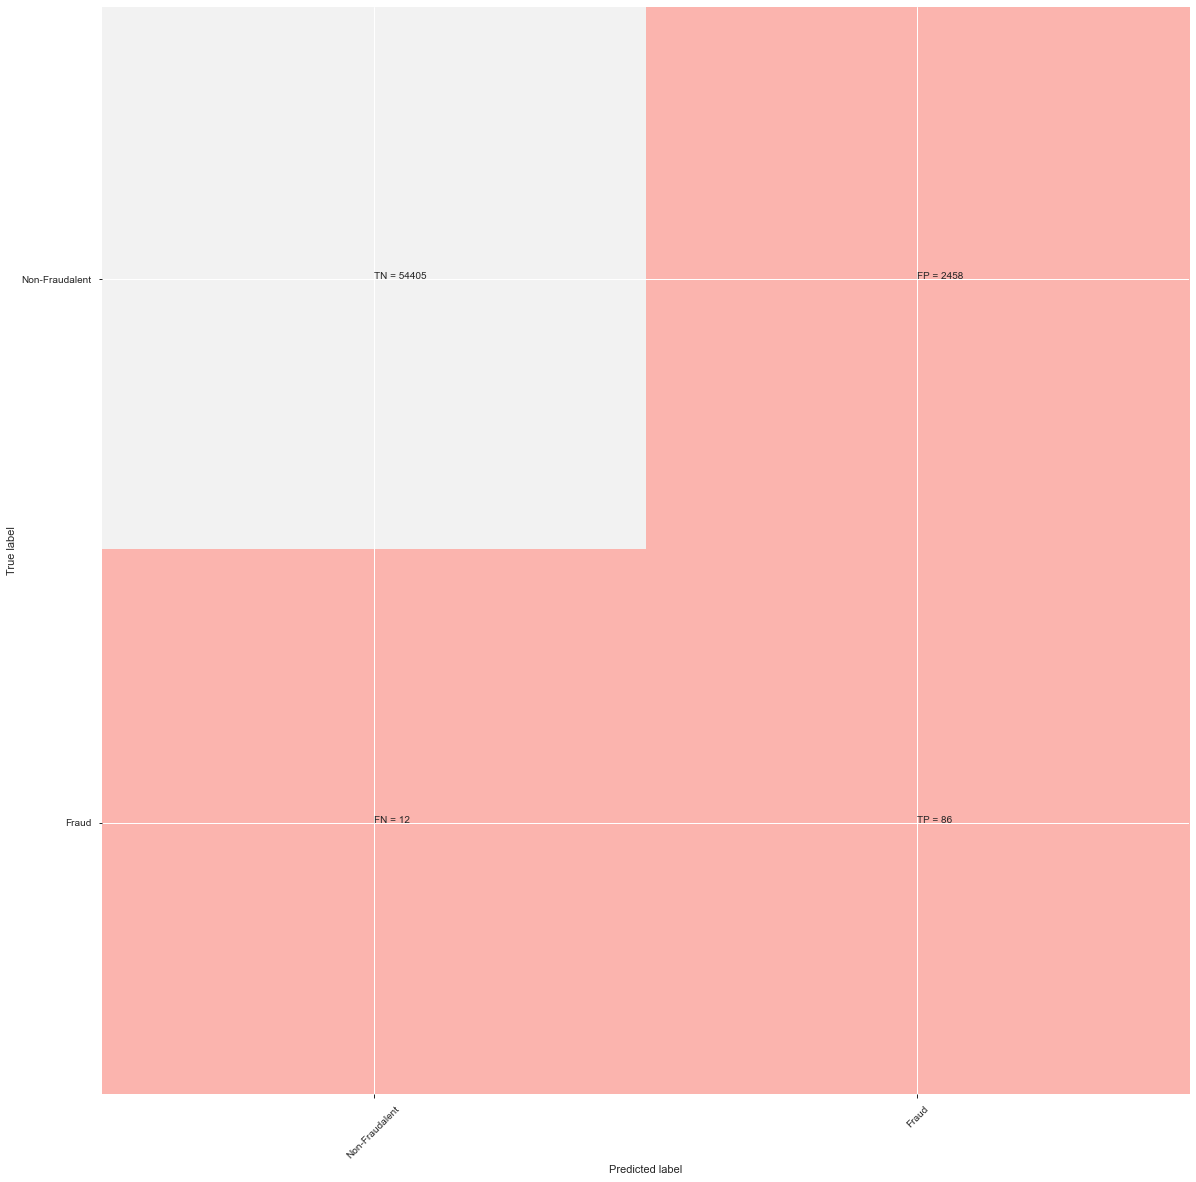

In [168]:
#print the evaluation result by choosing a evaluation metric
# Printing classification report
labels = ['No Fraud', 'Fraud']
print(classification_report(y_test_pt, y_pred_rf,target_names=labels))
accuracy = metrics.accuracy_score(y_test_pt, y_pred_rf)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )

cm = confusion_matrix(y_test_pt, y_pred_rf)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
classNames = ['Non-Fraudalent','Fraud']
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=10)
plt.show()

In [169]:
print("The recall score for prediction is {:0.2f}".format(recall_score(y_test_pt, y_pred_rf, pos_label = 24)))
print("The prescision score for predion is {:0.2f}".format(precision_score(y_test_pt, y_pred_rf, pos_label = 24)))
print("AUC for testdata:    \t", round(roc_auc_score(y_test_pt, y_pred_rf),5))

The recall score for prediction is 0.88
The prescision score for predion is 0.03
AUC for testdata:    	 0.91716


### XGBoost

In [170]:
## specify number of folds for k-fold CV
n_folds = 3

## parameters to build the model on
parameters = {'n_estimators': range(10, 1000, 100),
               'max_depth': range(5, 50, 5),
               'learning_rate' : [0.1,0.01,0.0001,0.00001],
               'gamma':[i/10.0 for i in range(0,5)],
               'subsample':[0.5,0.6,0.7,0.8,0.9] ,
               'colsample_bytree':[0.5,0.6,0.7,0.8,0.9]
                }

xg = XGBClassifier()
rs_cv_xg = RandomizedSearchCV(estimator=xg, 
                                param_distributions=parameters, 
                                cv=n_folds, scoring='roc_auc',
                                verbose=5,
                                n_jobs=-1,
                                return_train_score=True,
                                random_state=20)
rs_cv_xg.fit(X_train_adasyn, y_train_adasyn)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed: 61.8min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 157.7min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 157.7min finished


RandomizedSearchCV(cv=3, estimator=XGBClassifier(), n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.5, 0.6, 0.7, 0.8,
                                                             0.9],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.1, 0.01, 0.0001,
                                                          1e-05],
                                        'max_depth': range(5, 50, 5),
                                        'n_estimators': range(10, 1000, 100),
                                        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9]},
                   random_state=20, return_train_score=True, scoring='roc_auc',
                   verbose=5)

In [171]:
print("Best Estimator",rs_cv_xg.best_estimator_)
print("Best Accuracy",rs_cv_xg.best_score_)
#print the optimum value of hyperparameters
print("Best HyperParameters",rs_cv_xg.best_params_)
print("Best AUC",rs_cv_xg.best_score_)

Best Estimator XGBClassifier(colsample_bytree=0.8, gamma=0.0, max_depth=10, n_estimators=910,
              subsample=0.8)
Best Accuracy 0.9989604380173409
Best HyperParameters {'subsample': 0.8, 'n_estimators': 910, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 0.0, 'colsample_bytree': 0.8}
Best AUC 0.9989604380173409


### XGBoost With Optimal HyperParameters

In [172]:
clf_xg = XGBClassifier(subsample= 0.8, n_estimators= 910, max_depth=10, learning_rate= 0.1, gamma= 0.0, colsample_bytree= 0.8)
clf_xg.fit(X_train_adasyn, y_train_adasyn)

XGBClassifier(colsample_bytree=0.8, gamma=0.0, max_depth=10, n_estimators=910,
              subsample=0.8)

In [173]:
#prediction on the test data
y_pred_xg = clf_xg.predict(X_test_trans)

              precision    recall  f1-score   support

    No Fraud       1.00      1.00      1.00     56863
       Fraud       0.30      0.77      0.44        98

    accuracy                           1.00     56961
   macro avg       0.65      0.88      0.72     56961
weighted avg       1.00      1.00      1.00     56961

Accuracy for the test dataset 99.7%


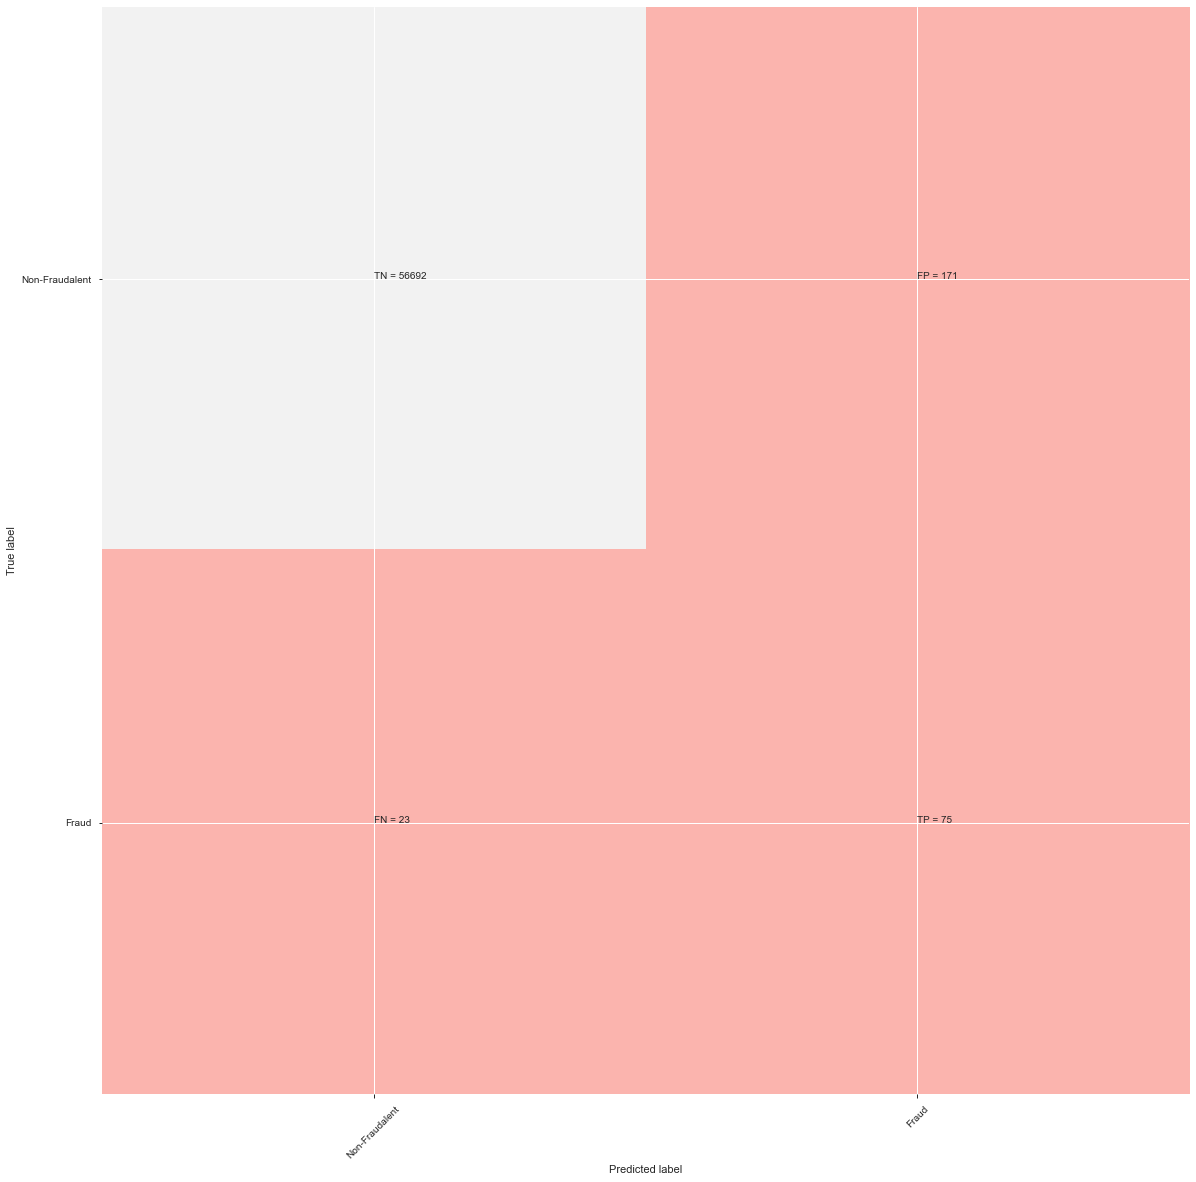

In [174]:
# Printing classification report
labels = ['No Fraud', 'Fraud']
print(classification_report(y_test_pt, y_pred_xg,target_names=labels))
accuracy = metrics.accuracy_score(y_test_pt, y_pred_xg)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )

cm = confusion_matrix(y_test_pt, y_pred_xg)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
classNames = ['Non-Fraudalent','Fraud']
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=10)
plt.show()

In [175]:
print("The recall score for prediction is {:0.2f}".format(recall_score(y_test_pt, y_pred_xg, pos_label = 24)))
print("The prescision score for predion is {:0.2f}".format(precision_score(y_test_pt, y_pred_xg, pos_label = 24)))
print("AUC for testdata:    \t", round(roc_auc_score(y_test_pt, y_pred_xg),5))

The recall score for prediction is 0.77
The prescision score for predion is 0.30
AUC for testdata:    	 0.88115


### SVC

In [176]:
## specify number of folds for k-fold CV
n_folds = 3

## parameters to build the model on
parameters = {'C' : [1,2],
               'gamma':['scale','auto']}

supvm = SVC()
rs_cv_svm = RandomizedSearchCV(estimator=supvm, 
                                param_distributions=parameters, 
                                cv=n_folds, scoring='roc_auc',
                                verbose=5,
                                n_jobs=-1,
                                return_train_score=True,
                                random_state=20)
rs_cv_svm.fit(X_train_adasyn, y_train_adasyn)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  12 | elapsed: 45.1min remaining: 22.5min
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed: 61.0min finished


RandomizedSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
                   param_distributions={'C': [1, 2],
                                        'gamma': ['scale', 'auto']},
                   random_state=20, return_train_score=True, scoring='roc_auc',
                   verbose=5)

In [177]:
print("Best Estimator",rs_cv_svm.best_estimator_)
print("Best Accuracy",rs_cv_svm.best_score_)
#print the optimum value of hyperparameters
print("Best Parameters",rs_cv_svm.best_params_)

Best Estimator SVC(C=2, gamma='auto')
Best Accuracy 0.9825425736760502
Best Parameters {'gamma': 'auto', 'C': 2}


### SVC With Optimal Hyperparameters

In [178]:
clf_svm = SVC(C=2,gamma='auto')
clf_svm.fit(X_train_adasyn, y_train_adasyn)

SVC(C=2, gamma='auto')

In [179]:
#prediction on the test data
y_pred_svm = clf_svm.predict(X_test_trans)

              precision    recall  f1-score   support

    No Fraud       1.00      1.00      1.00     56863
       Fraud       0.29      0.24      0.26        98

    accuracy                           1.00     56961
   macro avg       0.64      0.62      0.63     56961
weighted avg       1.00      1.00      1.00     56961

Accuracy for the test dataset 99.8%


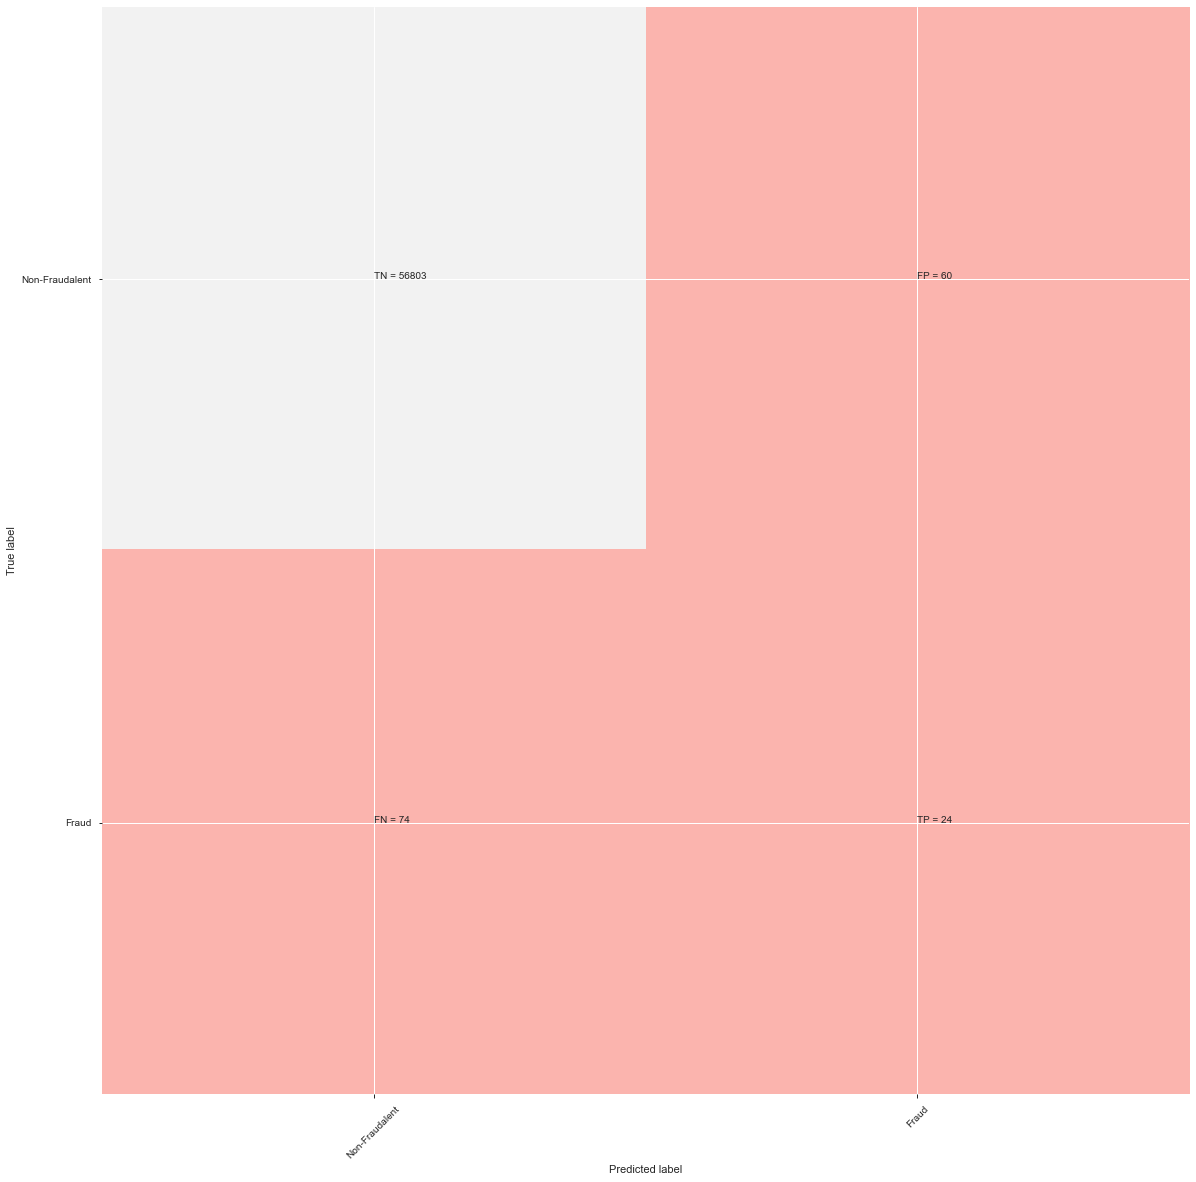

In [180]:
#print the evaluation result by choosing a evaluation metric
# Printing classification report
labels = ['No Fraud', 'Fraud']
print(classification_report(y_test_pt, y_pred_svm,target_names=labels))
accuracy = metrics.accuracy_score(y_test_pt, y_pred_svm)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )

cm = confusion_matrix(y_test_pt, y_pred_svm)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
classNames = ['Non-Fraudalent','Fraud']
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=10)
plt.show()

In [181]:
print("The recall score for prediction is {:0.2f}".format(recall_score(y_test_pt, y_pred_svm, pos_label = 24)))
print("The prescision score for predion is {:0.2f}".format(precision_score(y_test_pt, y_pred_svm, pos_label = 24)))
print("AUC for testdata:    \t", round(roc_auc_score(y_test_pt, y_pred_svm),5))

The recall score for prediction is 0.24
The prescision score for predion is 0.29
AUC for testdata:    	 0.62192


### Select the oversampling method which shows the best result on a model
- Apply the best hyperparameter on the model
- Predict on the test dataset

|      ImBalanced Data     |            |         |          |                  |
|:------------------------:|------------|---------|----------|------------------|
|           Model          | Precision  | Recall  | Accuracy | Area Under Curve |
| Logistic Regression      | 100%       | 49%     | 99.9%    | 74.48%           |
| Decision Tree            | 73%        | 63%     | 99.9%    | 81.61%           |
| Random Forest            | 82%        | 69%     | 99.8%    | 81.61%           |
| XGBoost                  | 73%        | 92%     | 99.9%    | 81.61%           |
| SVC                      | 97%        | 31%     | 99.9%    | 65.30%           |
| Balanced (Over Sampling) |            |         |          |                  |
| Logistic Regression      | 4%         | 91%     | 96%      | 93.42%           |
| Decision Tree            | 27%        | 74%     | 99.6%    | 87.02%           |
| Random Forest            | 49%        | 80%     | 99.8%    | 89.7%            |
| XGBoost                  | 82%        | 76%     | 99.9%    | 87.74%           |
| SVC                      | 35%        | 31%     | 99.8%    | 65%              |
|     Balanced (SMOTE)     |            |         |          |                  |
| Logistic Regression      | 3%         | 91%     | 95.2%    | 92.99%           |
| Decision Tree            | 5%         | 78%     | 97.5%    | 87.53%           |
| Random Forest            | 41%        | 76%     | 99.8%    | 87.6%            |
| XGBoost                  | 55%        | 76%     | 99.9%    | 87.7%            |
| SVC                      | 29%        | 26%     | 99.8%    | 62.7%            |
|     Balanced (ADAYSN)    |            |         |          |                  |
| Logistic Regression      | 1%         | 92%     | 87%      | 89.43%           |
| Decision Tree            | 2%         | 86%     | 93.7%    | 89.73%           |
| Random Forest            | 3%         | 87%     | 95.8%    | 91.2%            |
| XGBoost                  | 26%        | 77%     | 99.6%    | 88%              |
| SVC                      | 29%        | 24%     | 99.8%    | 62.19%           |

From the above it is clear that XGBoost with SMOTE balanced classification technique is producing AUC of 87.7% and Precision of about 55% and Recall of 76% and F1 Score of 64%. There by proving the model is best for prediction.

In [186]:
# perform the best oversampling method on X_train & y_train

clf = XGBClassifier(subsample= 0.5, n_estimators= 810, max_depth=20, learning_rate= 0.1, gamma= 0.2, colsample_bytree= 0.7)
clf.fit(X_train_smote, y_train_smote) 
y_pred_xg = clf.predict(X_test_trans)

              precision    recall  f1-score   support

    No Fraud       1.00      1.00      1.00     56863
       Fraud       0.48      0.76      0.59        98

    accuracy                           1.00     56961
   macro avg       0.74      0.88      0.79     56961
weighted avg       1.00      1.00      1.00     56961

Accuracy for the test dataset 99.8%


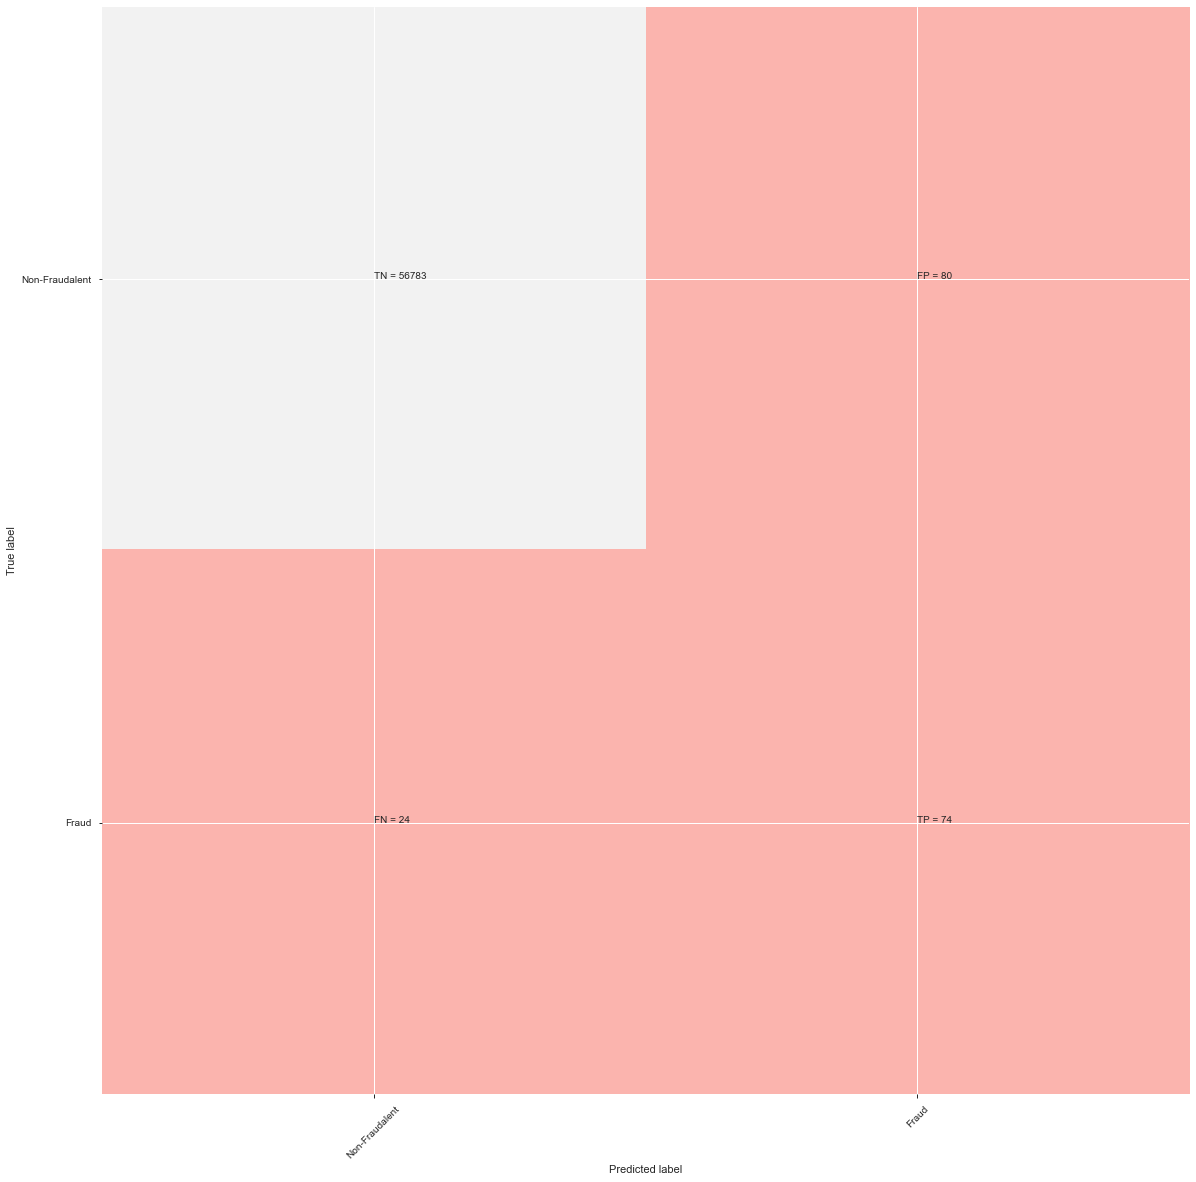

In [187]:
# Printing classification report
labels = ['No Fraud', 'Fraud']
print(classification_report(y_test_pt, y_pred_xg,target_names=labels))
accuracy = metrics.accuracy_score(y_test_pt, y_pred_xg)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )

cm = confusion_matrix(y_test_pt, y_pred_xg)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
classNames = ['Non-Fraudalent','Fraud']
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=10)
plt.show()

In [188]:
print("The recall score for prediction is {:0.2f}".format(recall_score(y_test_pt, y_pred_xg, pos_label = 24)))
print("The prescision score for predion is {:0.2f}".format(precision_score(y_test_pt, y_pred_xg, pos_label = 24)))
print("AUC for testdata:    \t", round(roc_auc_score(y_test_pt, y_pred_xg),5))

The recall score for prediction is 0.76
The prescision score for predion is 0.48
AUC for testdata:    	 0.87685


### Print the important features of the best model to understand the dataset

Top var = 14
2nd Top var = 10
3rd Top var = 4


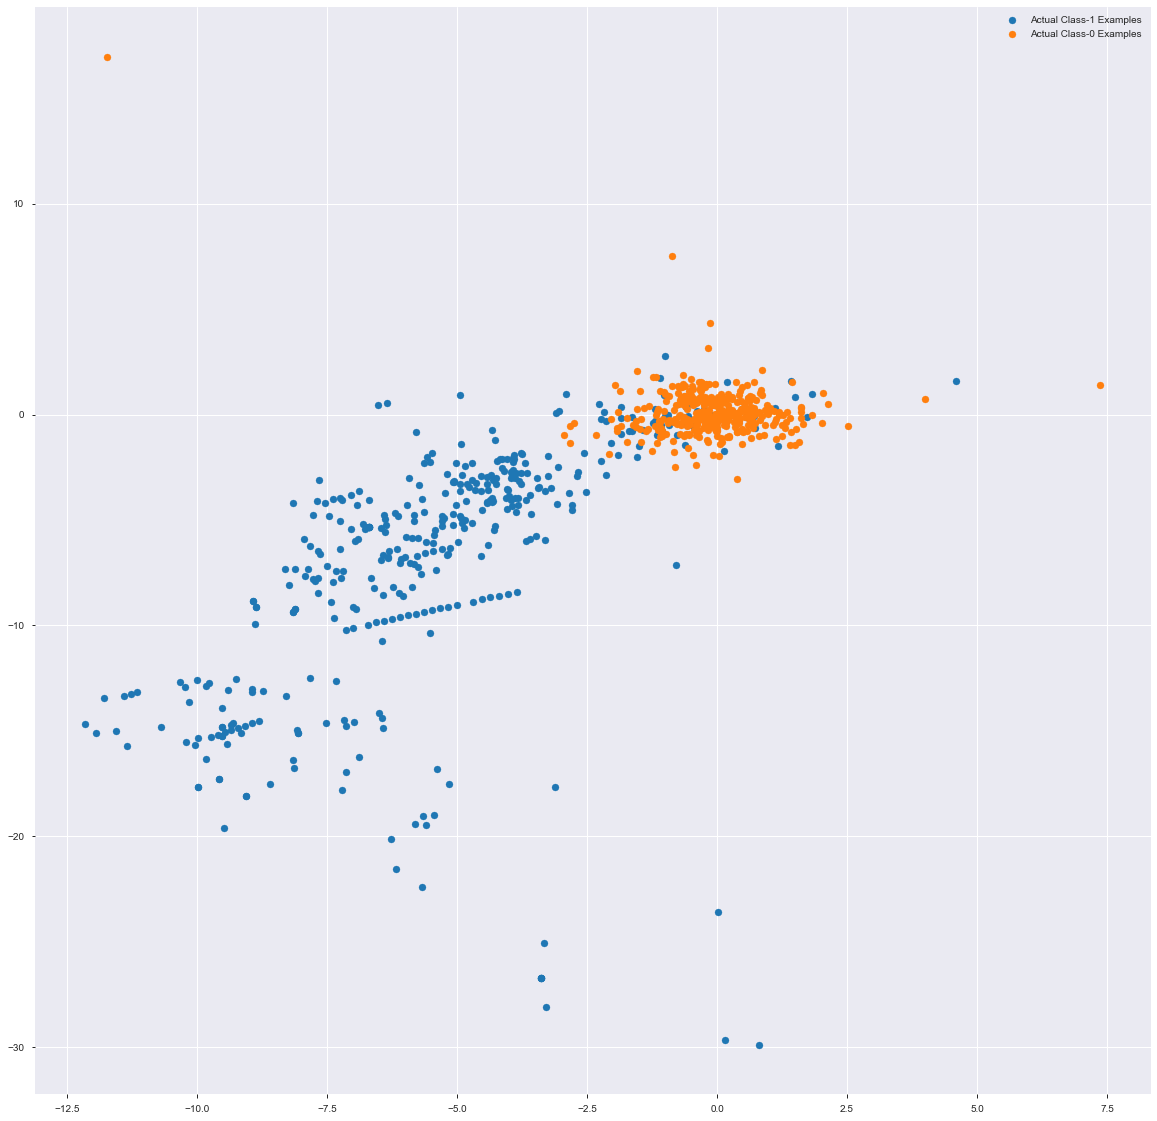

In [189]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train_cv.values[np.where(y_train_cv==1.0)]
X_train_0 = X_train_cv.values[np.where(y_train_cv==0.0)]
np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [192]:
# predictors
features = X_test_cv.columns

# feature_importance
importance = clf.feature_importances_

# create dataframe
feature_importance = pd.DataFrame({'variables': features, 'importance_percentage': importance*100})
feature_importance = round(feature_importance[['variables', 'importance_percentage']],2)

# sort features
feature_importance = feature_importance.sort_values('importance_percentage', ascending=False).reset_index(drop=True)
print("Sum of importance=", round(feature_importance.importance_percentage.sum(),0))
feature_importance

Sum of importance= 100.0


,variables,importance_percentage
0,V14,39.689999
1,V10,31.320000
2,V4,3.930000
3,V12,3.800000
4,V17,1.730000
5,V8,1.470000
6,V3,1.180000
7,V16,1.030000
8,V7,1.020000
9,V20,1.020000


**Lets Check Importance of variable in Plotting**

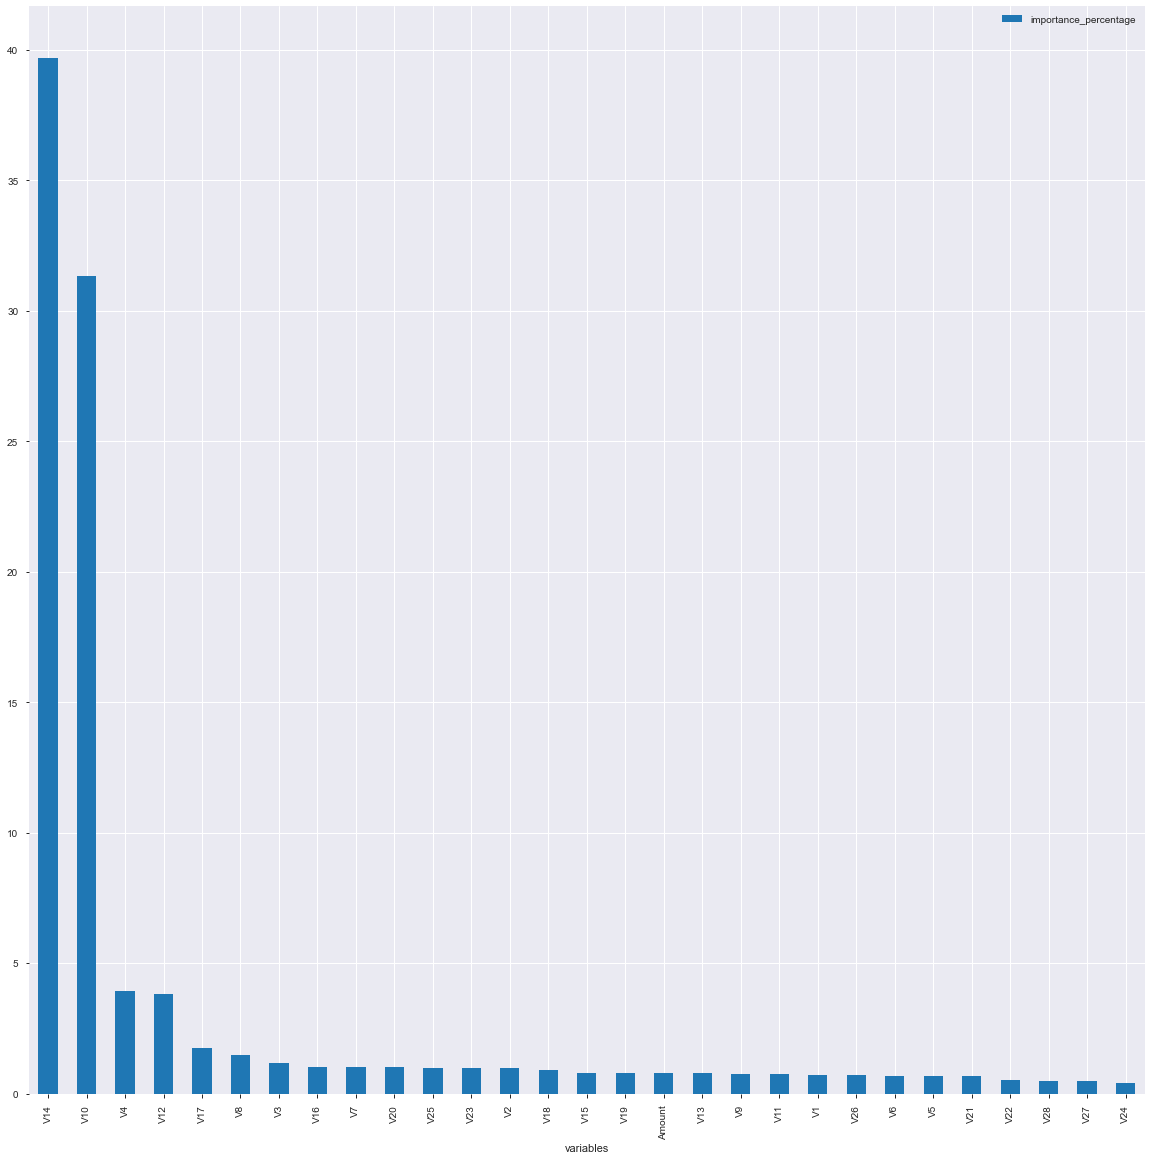

In [193]:
data_frame2 = feature_importance.set_index(['variables'])
data_frame2.plot.bar()
plt.show()

## Final Comments


**The Comparison table was prepared in order to compare various Fraud Detection mechanisms that were used in identifying credit card frauds. All the techniques of credit card fraud detection described in the table have its own strengths and weaknesses.**

**Results show that the fraud detection systems such as XGBoost-SMOTE and Random forest-SMOTE have very high accuracy in terms of TP, FP and AUC score. At the same time, the processing speed is fast enough to enable on-line detection of credit card fraud in case of as XGBoost-SMOTE and Random forest-SMOTE approach can be effectively used to counter frauds in banking industry. The Fraud detection rate of SVC is very slow when compared to other methods. XGBoost- takes less time for sequence alignment and it is inexpensive than others. The above all fraud detection systems are scalable for handling large volumes of transactions.**